# Model de diffusion dans un canal étroit 

Code origine : $\mathrm{\color{red}{Cumulant4\_fonction.py}}$ et  $\mathrm{\color{red}{DoubleRigidWallOverdampedBrownExp\_Cython.pyx}}$

Auteur : $\mathrm{\color{purple}{Élodie ~MILLAN}}$

Date : 14/01/2022


- $2H_p$ : hauteur du canal;
- $a$ : rayon de la particule;
- On pose $H = H_p -a$
- $\eta_0$ : viscosité du fluide
- $D_\|(z) = \frac{k_\mathrm{B}T}{6 \pi \eta_\| a}$ : coeficient de diffusion colinéaire au mur, avec $\eta_\| (z) = \eta_0 \left( 1 - \frac{9a}{16(z+a)} +  \left( \frac{a}{8(z+a)} \right)^3 - \left( \frac{45a}{256(z+a)} \right)^4 - \left( \frac{a}{16(z+a)} \right)^5 \right)^{-1}$. 
- $D_\perp(z) = \frac{k_\mathrm{B}T}{6 \pi \eta_\perp a}$ : coeficient de diffusion transverse au mur, avec $\eta_\perp(z) = \eta_0 \frac{6z^2 + 9az + 2a^2}{6z^2 + 2az}$.


Les viscosités effectives du fluide, transverse et colinaires, dû à la présence des deux mur s'écrivent : $\eta_\mathrm{eff} = \eta_\mathrm{B} + \eta_\mathrm{T} - \eta_0$, où le mur du bas est placé en $-H_\mathrm{P}$ et le mur du haut est en $+H_\mathrm{P}$. Les deux murs sont donc distant de $2 H_\mathrm{P}$.

La particule est soumise au poids et à la répulstion electronique des deux mur, donc le potentiel vaud :

\begin{equation}
    V = B k_\mathrm{B}T \left( \exp \left( -\frac{z_\mathrm{B}}{l_\mathrm{D}} \right) + \exp \left( -\frac{z_\mathrm{T}}{l_\mathrm{D}} \right)  \right) + \frac{k_\mathrm{B} T }{l_\mathrm{B}}z = B k_\mathrm{B}T \left( \exp \left( -\frac{(H+z)}{l_\mathrm{D}} \right) + \exp \left( -\frac{(H-z)}{l_\mathrm{D}} \right)  \right) + \frac{k_\mathrm{B} T }{l_\mathrm{B}}z.
\end{equation}
avec $z_\mathrm{B} = H+z$ la distance entre la particule (en $z$) et le mur du bas ; et $z_\mathrm{T} = H-z$, celle entre la particule et le mur du haut.

La force électrostatique vaud alors :
\begin{equation}
    F_\mathrm{elec} = -\frac{\partial V_\mathrm{elec}}{\partial z} = \frac{B k_\mathrm{B}T }{l_\mathrm{D}} e^{- \frac{H}{l_\mathrm{D}}} \left( \exp \left( -\frac{z}{l_\mathrm{D}} \right) - \exp \left( \frac{z}{l_\mathrm{D}} \right)  \right),
\end{equation}
et la force gravitaire :
\begin{equation}
    F_\mathrm{grav} = -\frac{k_\mathrm{B} T }{l_\mathrm{B}}.
\end{equation}

La PDF de $z$ s'écrit alors :
\begin{equation}
    P_\mathrm{eq}(z) = \frac{1}{N} \exp \left( -\frac{V}{k_\mathrm{B}T} \right) = \frac{1}{N} e^{ - B  \left( \exp \left( -\frac{(H+z)}{l_\mathrm{D}} \right) + \exp \left( -\frac{(H-z)}{l_\mathrm{D}} \right)  \right) - \frac{z}{l_\mathrm{B}}},
\end{equation}

\begin{equation}
    P_\mathrm{eq}(z) = \frac{1}{N} e^{ - B \exp \left( -\frac{H}{l_\mathrm{D}} \right) \left \{ \exp \left( -\frac{z}{l_\mathrm{D}} \right) + \exp \left( +\frac{z}{l_\mathrm{D}} \right)  \right \} - \frac{z}{l_\mathrm{B}}}.
\end{equation}

Le spurious drift s'écrit :
\begin{equation}
    F_\mathrm{spurious} = k_\mathrm{B}T \frac{D_{\perp,\mathrm{eff}} '(z)}{D_{\perp,\mathrm{eff}}(z)} = D_{\perp,\mathrm{eff}} '(z) \gamma_{\perp,\mathrm{eff}}(z) = - \frac{k_\mathrm{B}T (\eta_\mathrm{B}'(z) + \eta_\mathrm{T}'(z))}{6 \pi a (\eta_\mathrm{B}(z) + \eta_\mathrm{T}(z) - \eta_0)^2} \gamma_{\perp,\mathrm{eff}}(z)
\end{equation}
avec :
\begin{equation}
    \eta_\mathrm{eff,\perp}'(z) = \eta_\mathrm{B}'(z) + \eta_\mathrm{T}'(z) = \eta_0 \left( \frac{a}{(H-z)^2} - \frac{a}{(H+z)^2} - \frac{3(8a-9)}{2(a+3H-3z)^2} + \frac{3(8a-9)}{2(a+3H+3z)^2}  \right) 
\end{equation}


$\mathrm{B}=\mathrm{Bottom}$, $\mathrm{T}=\mathrm{Top}$

Équation de Langevin overdamped:
\begin{equation}
   \gamma_\mathrm{eff} (z) \frac{\mathrm{d}z}{\mathrm{d}t} = F_\mathrm{grav} + F_\mathrm{elec} - F_\mathrm{spurious} + w(z) \frac{\mathrm{d}B_t}{\mathrm{d}t}
\end{equation}

\begin{equation}
   z_{i+1} = z_i + \left( F_\mathrm{grav} + F_\mathrm{elec} - F_\mathrm{spurious} + w(z) \frac{\mathrm{d}B_t} {\mathrm{d}t} \right) \frac{\mathrm{d}t}{\gamma_\mathrm{eff}(z)}
\end{equation}

\begin{equation}
   z_{i+1} = z_i + \left( F_\mathrm{grav} + F_\mathrm{elec} \right) \frac{\mathrm{d}t}{\gamma_\mathrm{eff} (z)} - D_\mathrm{eff,\perp}' \mathrm{d}t  + w(z) \mathrm{RNG} \mathrm{d}t.
\end{equation}


\begin{equation}
a = 1.5~\mu\mathrm{m} \\
\eta_0 = 10^{-3}~\mathrm{Pa.s}  \\
H_\mathrm{p} = 2.5~\mu\mathrm{m}  \\
B = 4.8  \\
l_\mathrm{D} = 500~n\mathrm{m}  \\
l_\mathrm{B} = 597~n\mathrm{m} 
\end{equation}

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from C4_theo_asymptotique__trapz import C4_court, C4_long
from DoubleRigidWallOverdampedBrownExp_Cython import RigidWallOverdampedLangevin3D
import cythonised_simu_part

from scipy.integrate import quad
from scipy.io import loadmat
from scipy.optimize import curve_fit
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from numpy import trapz

import csv


def cm2inch(value):
    return value / 2.54

from tqdm import tqdm
# axes.xaxis.set_tick_params(direction='in', which='both')
# axes.yaxis.set_tick_params(direction='in', which='both')



from matplotlib import rc




In [3]:
import seaborn as sns
custom_params = {
    "xtick.direction": "in",
    "ytick.direction": "in",
    "lines.markeredgecolor": "k",
    "lines.markeredgewidth": 1,
    "figure.dpi": 200,
    "text.usetex": True,
    "font.family": "serif"
}


sns.set_theme(context = "poster", style="ticks", rc=custom_params)

In [4]:
# Param fixé comme expériences
a = 1.519e-6 #1.12e-6/2
H = 40e-6
lD = 88.0e-9 #Répultion mur
kBT=1.38e-23*300
lB = 526e-9 #gravité
B = 5.0
eta=0.001

zz = np.linspace(-H+H*1e-3, H-H*1e-3, 1000)

dt = 1e-1
Nt = 1000000
Nt_sub = 1

In [5]:
lB

5.26e-07

In [6]:
def _gamma_z_eff(zi_1, a, eta, H):
    """
    Formule de Padé
    """
    # Mur Top
    gam_z = (
        6
        * np.pi
        * a
        * eta
        * (
            (
                (6 * (H-zi_1)**2 + 9*a*(H-zi_1) + 2*a**2)
                / (6 * (H-zi_1)**2 + 2*a*(H-zi_1))
            )
        )
    )
    # Mur Bottom
    gam_z_2 = (
        6
        * np.pi
        * a
        * eta
        * (
            (
                (6 * (H+zi_1)**2 + 9*a*(H+zi_1) + 2*a**2)
                / (6 * (H+zi_1)**2 + 2*a*(H+zi_1))
            )
        )
    )

    gam_z_0 = 6 * np.pi * a * eta

    return (gam_z + gam_z_2 - gam_z_0)

def _gamma_xy_eff(zi_1, a, eta, H):
    """
    Formule de Libshaber
    """
    # Mur Top
    xi_T = a / ((H-zi_1) + a)
    gam_xy_T = (
        6
        * np.pi
        * a
        * eta
        * (
            1
            - 9 / 16 * xi_T
            + 1 / 8 * xi_T**3
            - 45 / 256 * xi_T ** 4
            - 1 / 16 * xi_T ** 5
        )
        ** (-1)
    )
    
    #Mur Bottom
    xi_B = a / ((H+zi_1) + a)
    gam_xy_B = (
        6
        * np.pi
        * a
        * eta
        * (
            1
            - 9 / 16 * xi_B
            + 1 / 8 * xi_B**3
            - 45 / 256 * xi_B ** 4
            - 1 / 16 * xi_B ** 5
        )
        ** (-1)
    )

    gam_xy_0 = 6 * np.pi * a * eta

    return (gam_xy_T + gam_xy_B - gam_xy_0)



def Dprime_z_eff(zi, kBT, eta, a, H):
    # Spurious force pour corriger overdamping (Auteur: Dr. Maxime Lavaud)
    eta_B = lambda zi: eta * (6*(H+zi)**2 + 9*a*(H+zi) + 2*a**2) / (6*(H+zi)**2 + 2*a*(H+zi))
    eta_T = lambda zi: eta * (6*(H-zi)**2 + 9*a*(H-zi) + 2*a**2) / (6*(H-zi)**2 + 2*a*(H-zi))
    
    eta_B_primes = -(a * eta * (2 * a ** 2 + 12 * a * (H + zi) + 21 * (H + zi) ** 2)) / (
        2 * (H + zi) ** 2 * (a + 3 * (H + zi)) ** 2
    )
    eta_T_primes = (
        a
        * eta
        * (2 * a ** 2 + 12 * a * (H-zi) + 21 * (H-zi) ** 2)
        / (2 * (a + 3*H - 3*zi) ** 2*(H-zi) ** 2)
    )
    
    eta_eff = eta_B(zi) + eta_T(zi) - eta
    eta_eff_prime = eta_B_primes + eta_T_primes

    return  - kBT / (6*np.pi*a) * eta_eff_prime / eta_eff**2

V_theo = lambda z: B*kBT*np.exp(-H/lD)*(np.exp(-z/lD) + np.exp(+z/lD)) + kBT/lB*z
D_perp = lambda z: kBT/_gamma_z_eff(z, a, eta, H)
D_para = lambda z: kBT/_gamma_xy_eff(z, a, eta, H)
D_0 = lambda z: kBT/(6*np.pi*eta*a*np.ones(len(z)))

F_elec = lambda z: B * kBT/lD * np.exp(-H/lD) * (np.exp(-z/lD) - np.exp(z/lD))
F_grav = lambda z: - kBT/lB*np.ones(len(z))


P_eq = lambda z: np.exp(-B*np.exp(-H/lD)*(np.exp(-z/lD) + np.exp(z/lD)) - z/lB)
z = np.linspace(-H, H, 1000)
Z = np.trapz(P_eq(z),z)

F_spurious = lambda z: Dprime_z_eff(z, kBT, eta, a, H)*gamma_z_eff(z, eta, a, H)



def gauss(x, mu, std):
    return 1 / (np.sqrt(2 * np.pi)*std) * np.exp(-((x-mu)/std) ** 2 / 2)



def P_D(len_dZ, Diff):
    # Computing the D PDF.
    epsilon=H*1e-8
    z = np.linspace(-(H-epsilon), (H-epsilon), len_dZ)
    P_D = Diff(z) * P_eq(z) 
    P_D = P_D / np.trapz(P_D, z) # extra step to ensure PDF normalization
    return Diff(z), P_D

def _P_Dz_short_time(dZ, tau, Diff, len_dZ):
    # Using the D PDF to compute P()
    D_z, P_Di = P_D(len_dZ, Diff)
    P = P_Di / np.sqrt(4 * np.pi * D_z * tau) * np.exp(-(dZ ** 2) / (4 * D_z * tau))
    P = np.trapz(P, D_z)
    return P

# Creating a handy function for easier use with Dz numpy arrays
def P_Dz_short_time(dZ, tau, Diff):
    P = np.array([_P_Dz_short_time(i, tau, Diff, len(dZ)) for i in dZ])
    P = P / np.trapz(P, dZ) # extra step to ensure PDF normalization
    return P

In [7]:
# P_Dz_short_time(dZZ*1e-6, dt*N_tau, D_perp)

# Simu + moyenne de $C4_x$ et $C4_y$ --> donnant plus de stat pour $C4_\|$

In [8]:
Nsim = 1000

def compute(n):
    datafile = 'C4_Datas/lD_{:e}_lB_{:e}_B_{:e}_H_{:e}_a_{:e}_dt_{:e}_Nt_{}_Ntsub_{}_'.format(lD, lB, B, H, a, dt, Nt, Nt_sub).replace(".", "p") + ".csv"
    simu = RigidWallOverdampedLangevin3D(dt=dt, Nt=Nt, a=a, H=H, lD=lD, lB=lB, B=B, Nt_sub=Nt_sub)
    simu.trajectory()
    taux, c4x = simu.Cumulant4("x")
    tauy, c4y = simu.Cumulant4("y")
    tau = (taux+tauy)/2
    c4 = (c4x+c4y)/2
    csvfile = open(datafile,'a', newline='')
    writer = csv.writer(csvfile)
    writer.writerow(c4)
    
# with Pool(7) as p:
#     p.map(compute, range(Nsim))

In [9]:
# stop (après ce sont des tests / ou pour poster)

In [10]:
simu = RigidWallOverdampedLangevin3D(dt=dt, Nt=Nt, a=a, H=H, lD=lD, lB=lB, B=B, Nt_sub=Nt_sub)
simu.trajectory()

Rs = np.zeros([Nt, 3])
Rs[:,0] = simu.x
Rs[:,1] = simu.y
Rs[:,2] = simu.z

In [11]:
tau_x, msd_x = simu.MSD("x")

100%|██████████████████████████████████████████| 54/54 [00:00<00:00, 602.17it/s]


In [12]:
tau_z, msd_z = simu.MSD("z")

100%|██████████████████████████████████████████| 54/54 [00:00<00:00, 626.97it/s]


In [13]:
N_tau = 1
z1 = np.linspace(0, H, 1000)

Dz = np.array([kBT / cythonised_simu_part.gamma_z_eff(i, a,  eta, H) for i in z])
Dx = np.array([kBT / cythonised_simu_part.gamma_xy_eff(i, a,  eta, H) for i in z])
D0 = kBT/(6*np.pi*simu.eta*simu.a)


Peq = P_eq(z)/np.trapz(P_eq(z), z)

mean_Dx = np.trapz(Peq*Dx, z)
mean_Dz = np.trapz(Peq*Dz, z)


# PDF(dX)
dX = simu.x[N_tau:] - simu.x[:-N_tau]
std_num_dX = np.std(dX)
hist, bin_edges = np.histogram(dX, bins=50, density=False)
binsPositions_dX = (bin_edges[:-1] + bin_edges[1:]) / 2
pdf_dX = hist / np.trapz(hist, binsPositions_dX*1e6)


In [14]:
# PDF(dZ) court
dZ = simu.z[N_tau:] - simu.z[:-N_tau]
std_num_dZ = np.std(dZ)
hist, bin_edges = np.histogram(dZ, bins=50, density=False)
binsPositions_dZ = (bin_edges[:-1] + bin_edges[1:]) / 2
pdf_dZ = hist / np.trapz(hist, binsPositions_dZ*1e6)

# PDF(dZ) long
N_tau_long = 10000
dZ_long = simu.z[N_tau_long:] - simu.z[:-N_tau_long]
std_num_dZ_long = np.std(dZ_long)
hist, bin_edges = np.histogram(dZ_long, bins=50, density=False)
binsPositions_dZ_long = (bin_edges[:-1] + bin_edges[1:]) / 2
pdf_dZ_long = hist / np.trapz(hist, binsPositions_dZ_long*1e6)

In [15]:
N_tau*dt

0.1

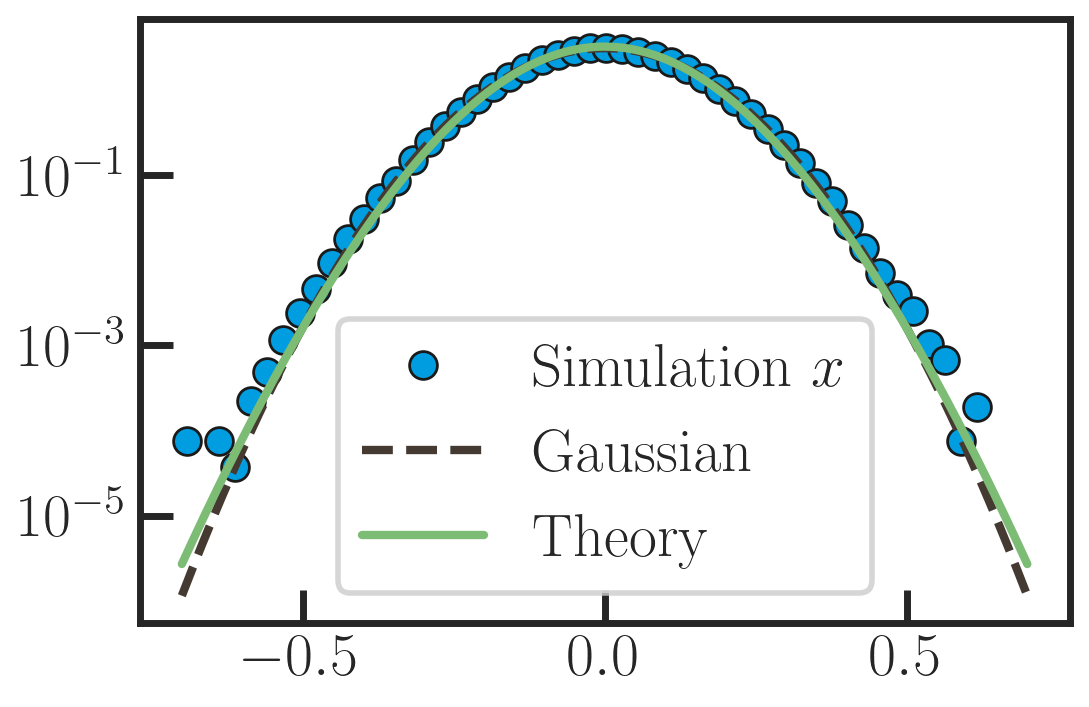

In [16]:
dXX = np.linspace(-0.7, +0.7, 1000)
theory_x = P_Dz_short_time(dXX*1e-6, dt*N_tau, D_para)

plt.semilogy(binsPositions_dX*1e6, pdf_dX/np.trapz(pdf_dX,binsPositions_dX*1e6), "o", color="#009de0ff", markersize=10, label=r"Simulation $x$")
plt.plot(dXX, gauss(dXX*1e-6, 0, np.sqrt(2*mean_Dx*dt*N_tau)) / np.trapz(gauss(dXX*1e-6, 0, np.sqrt(2*mean_Dx*dt*N_tau)), dXX), "--", color="#443A31",linewidth=3, label=r"Gaussian")
# plt.xlim([-0.3, 0.3])
# plt.ylim([1e-4, None])
plt.plot(dXX, theory_x/np.trapz(theory_x,dXX), "-", color="#7dbc74",  label="Theory")

plt.legend()

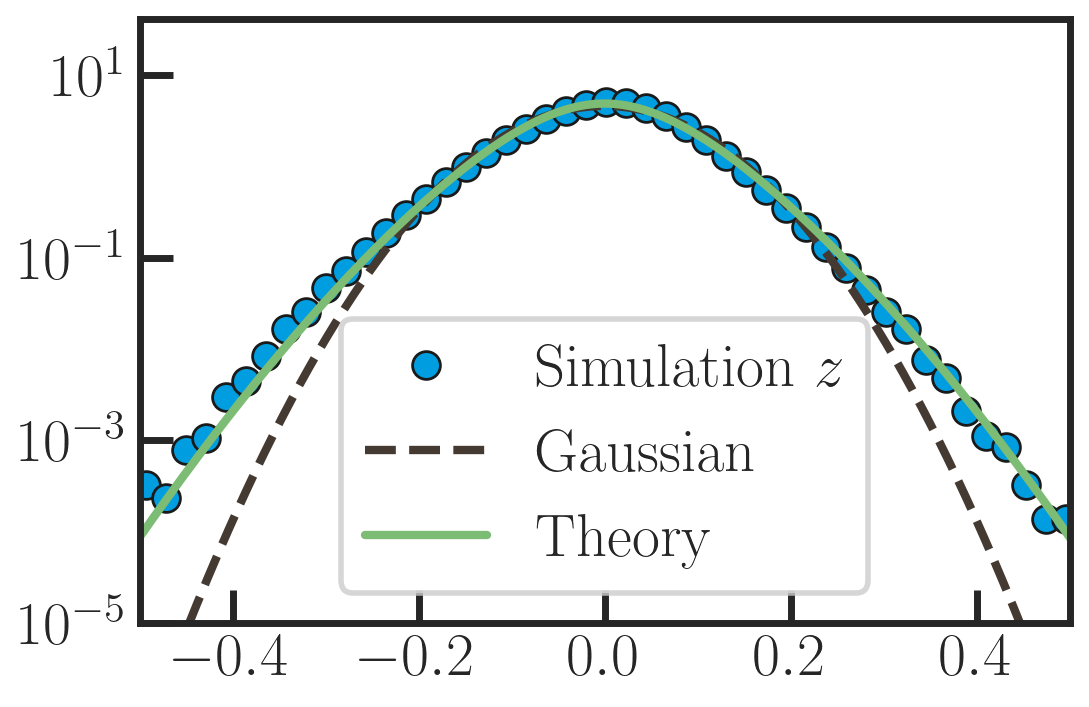

In [17]:
dZZ = np.linspace(-0.8, +0.8, 1000)
theory = P_Dz_short_time(dZZ*1e-6, dt*N_tau, D_perp)

plt.semilogy(binsPositions_dZ*1e6, pdf_dZ/np.trapz(pdf_dZ,binsPositions_dZ*1e6), "o", color="#009de0ff", markersize=10, label=r"Simulation $z$")
plt.plot(dZZ, gauss(dZZ*1e-6, 0, np.sqrt(2*mean_Dz*dt*N_tau)) / np.trapz(gauss(dZZ*1e-6, 0, np.sqrt(2*mean_Dz*dt*N_tau)), dZZ), "--", color="#443A31",linewidth=3, label=r"Gaussian")

plt.xlim([-0.5, 0.5])
plt.ylim([1e-5, None])
plt.plot(dZZ, theory/np.trapz(theory,dZZ), "-", color="#7dbc74", label="Theory")
plt.legend()

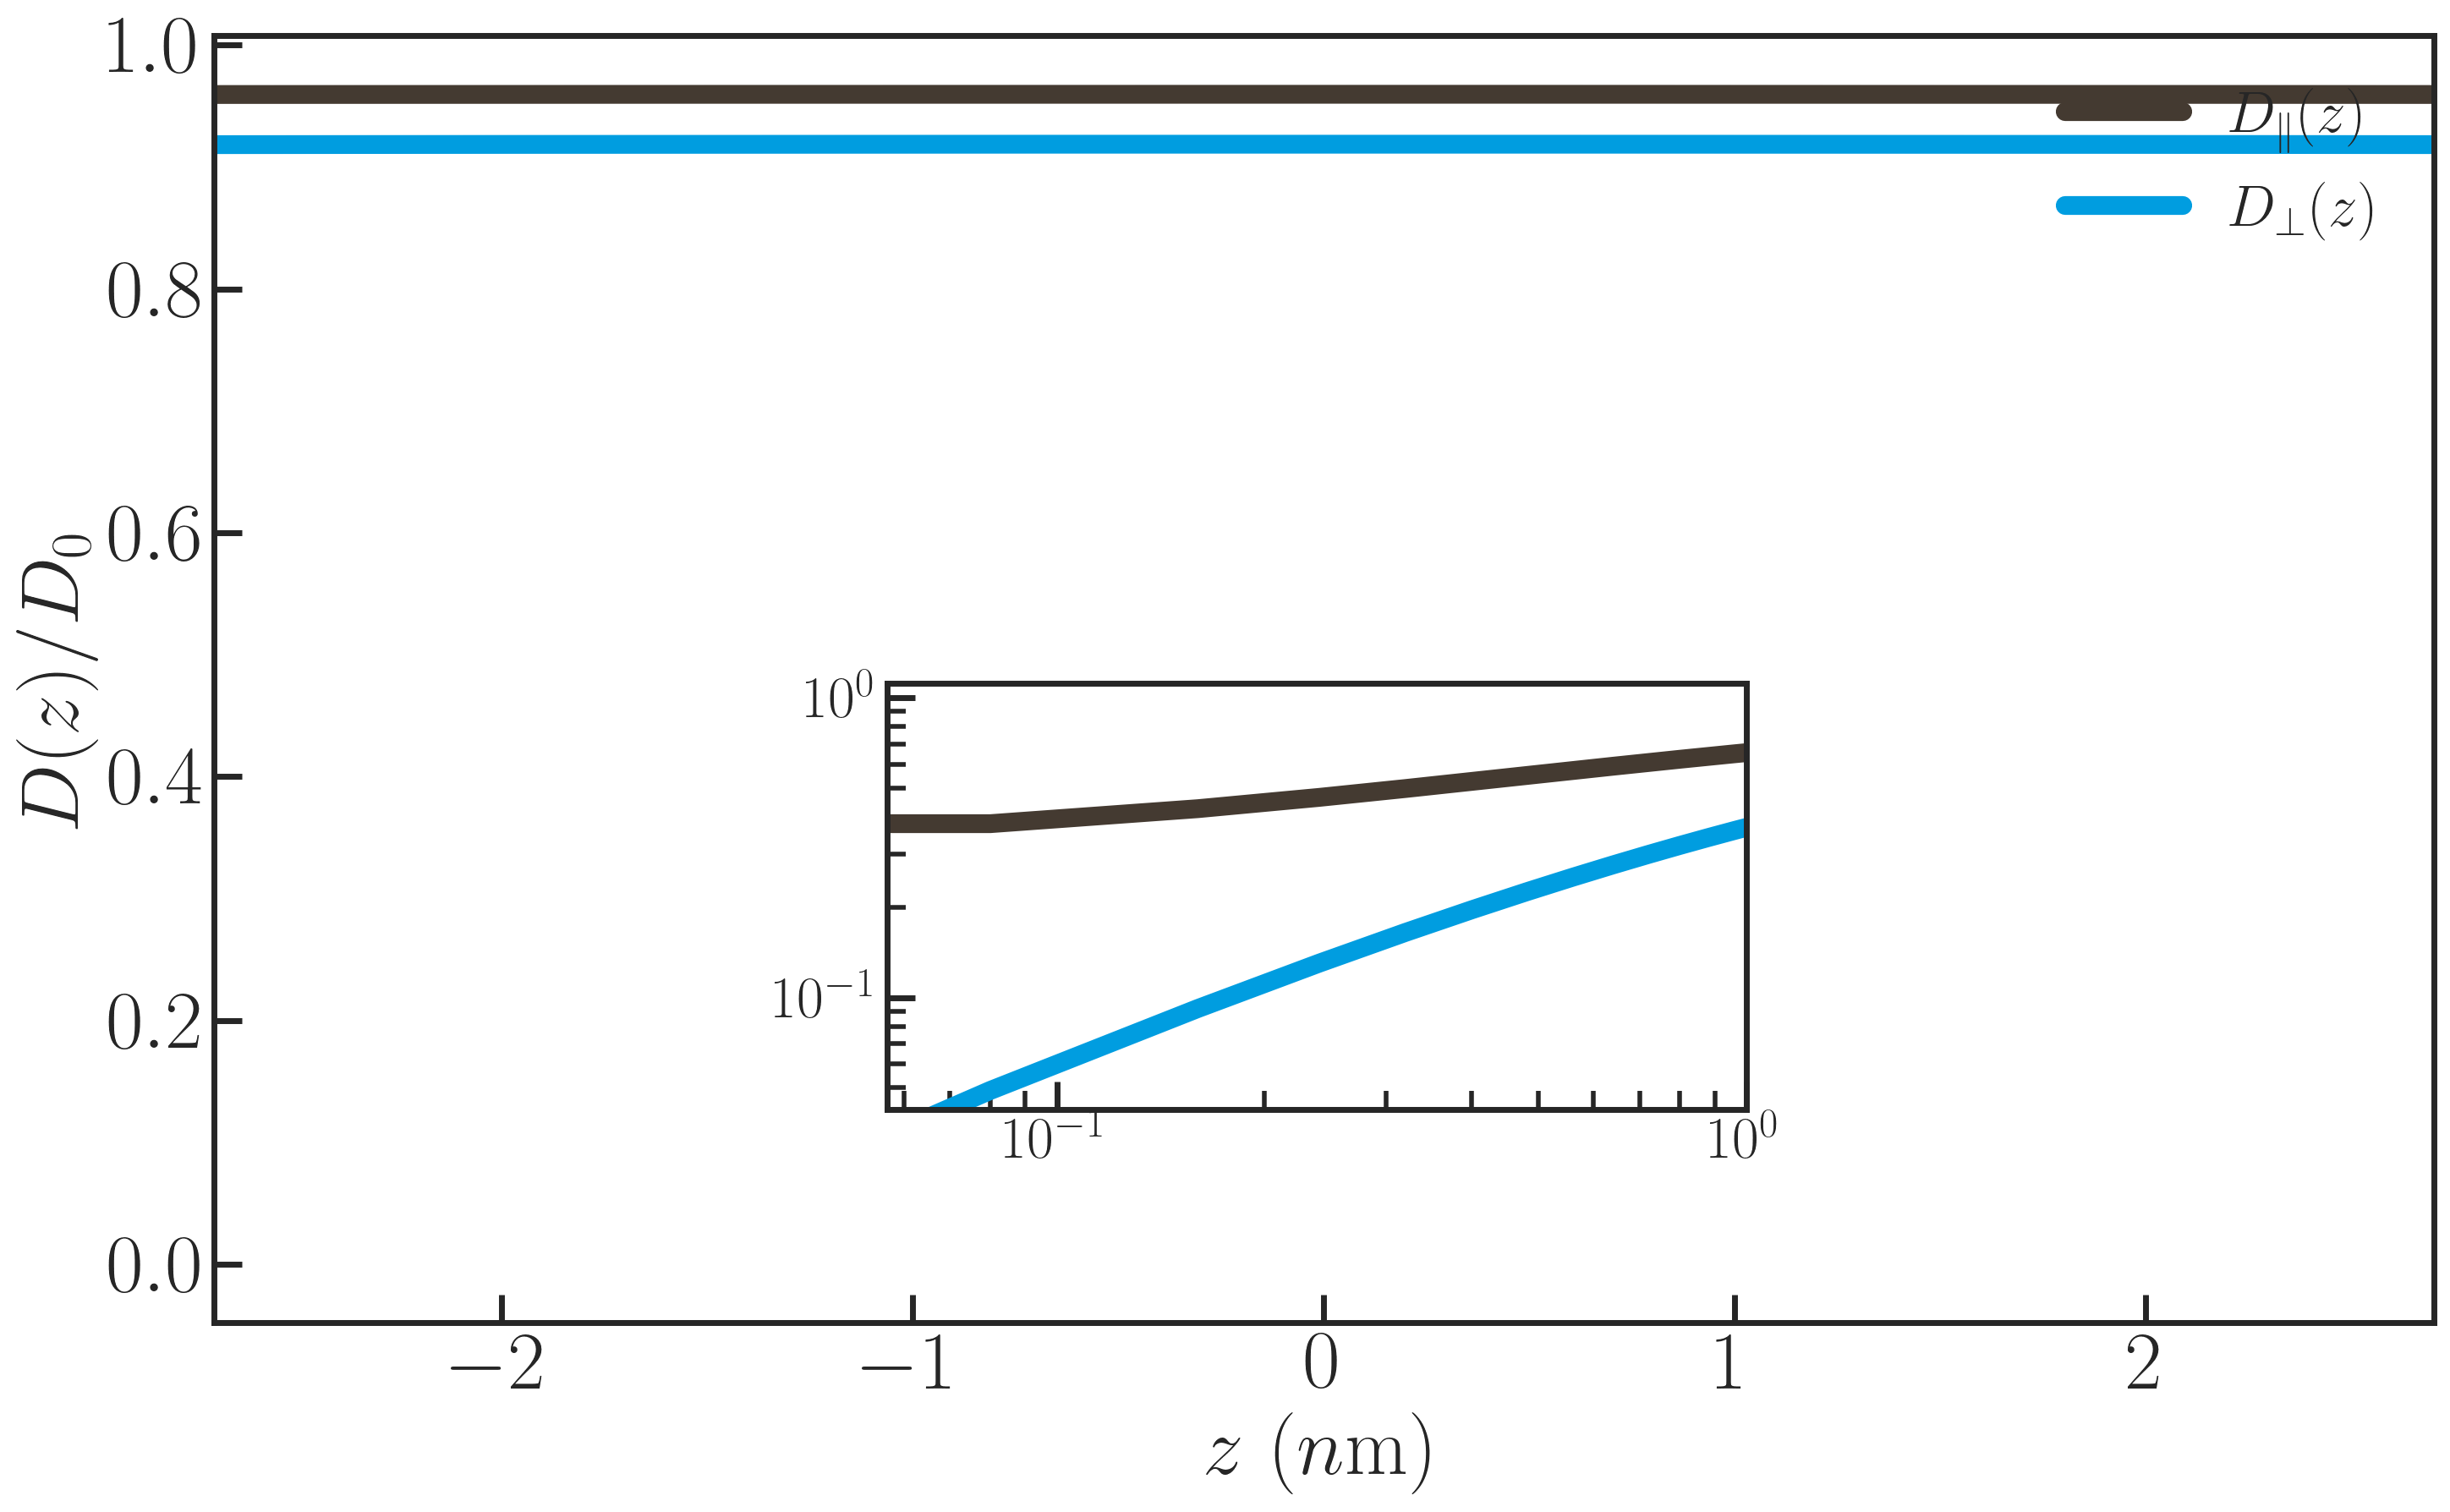

In [18]:
left, bottom, width, heigth = [0.36, 0.25, 0.3, 0.25]

fig = plt.figure(figsize=(25.2*0.4*1.68, 25.2*0.4))
ax1 = fig.gca()

xmin = -2.7
xmax = 2.7

ax1.plot(z*1e6, Dx/D0, label=r"$D_\|(z)$", color="#443A31", linewidth=8)
ax1.plot(z*1e6, Dz/D0, label=r"$D_\perp(z)$", color="#009de0ff", linewidth=8)
ax1.axvspan(xmin, -H*1e6, color="grey")
ax1.axvspan(+H*1e6, xmax, color="grey")
plt.xticks(fontsize=35)
plt.yticks(fontsize=35)


ax2=fig.add_axes([left, bottom, width, heigth])
ax2.loglog((z+H)*1e6, Dx/D0, label=r"$D_\perp(z)$", color="#443A31", linewidth=8)
ax2.loglog((z+H)*1e6, Dz/D0, label=r"$D_\perp(z)$", color="#009de0ff", linewidth=8)
ax2.set_xlim([None, 1])


plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
ax1.set_ylabel(r"$D(z)/D_0$", fontsize=35)
ax1.set_xlabel(r"$z$ ($n\mathrm{m}$)", fontsize=35)
ax1.legend(loc="upper right",frameon=False, fontsize=25 )
ax1.set_xlim([xmin, xmax])
plt.savefig("D.svg")

In [19]:
D_0

<function __main__.<lambda>(z)>

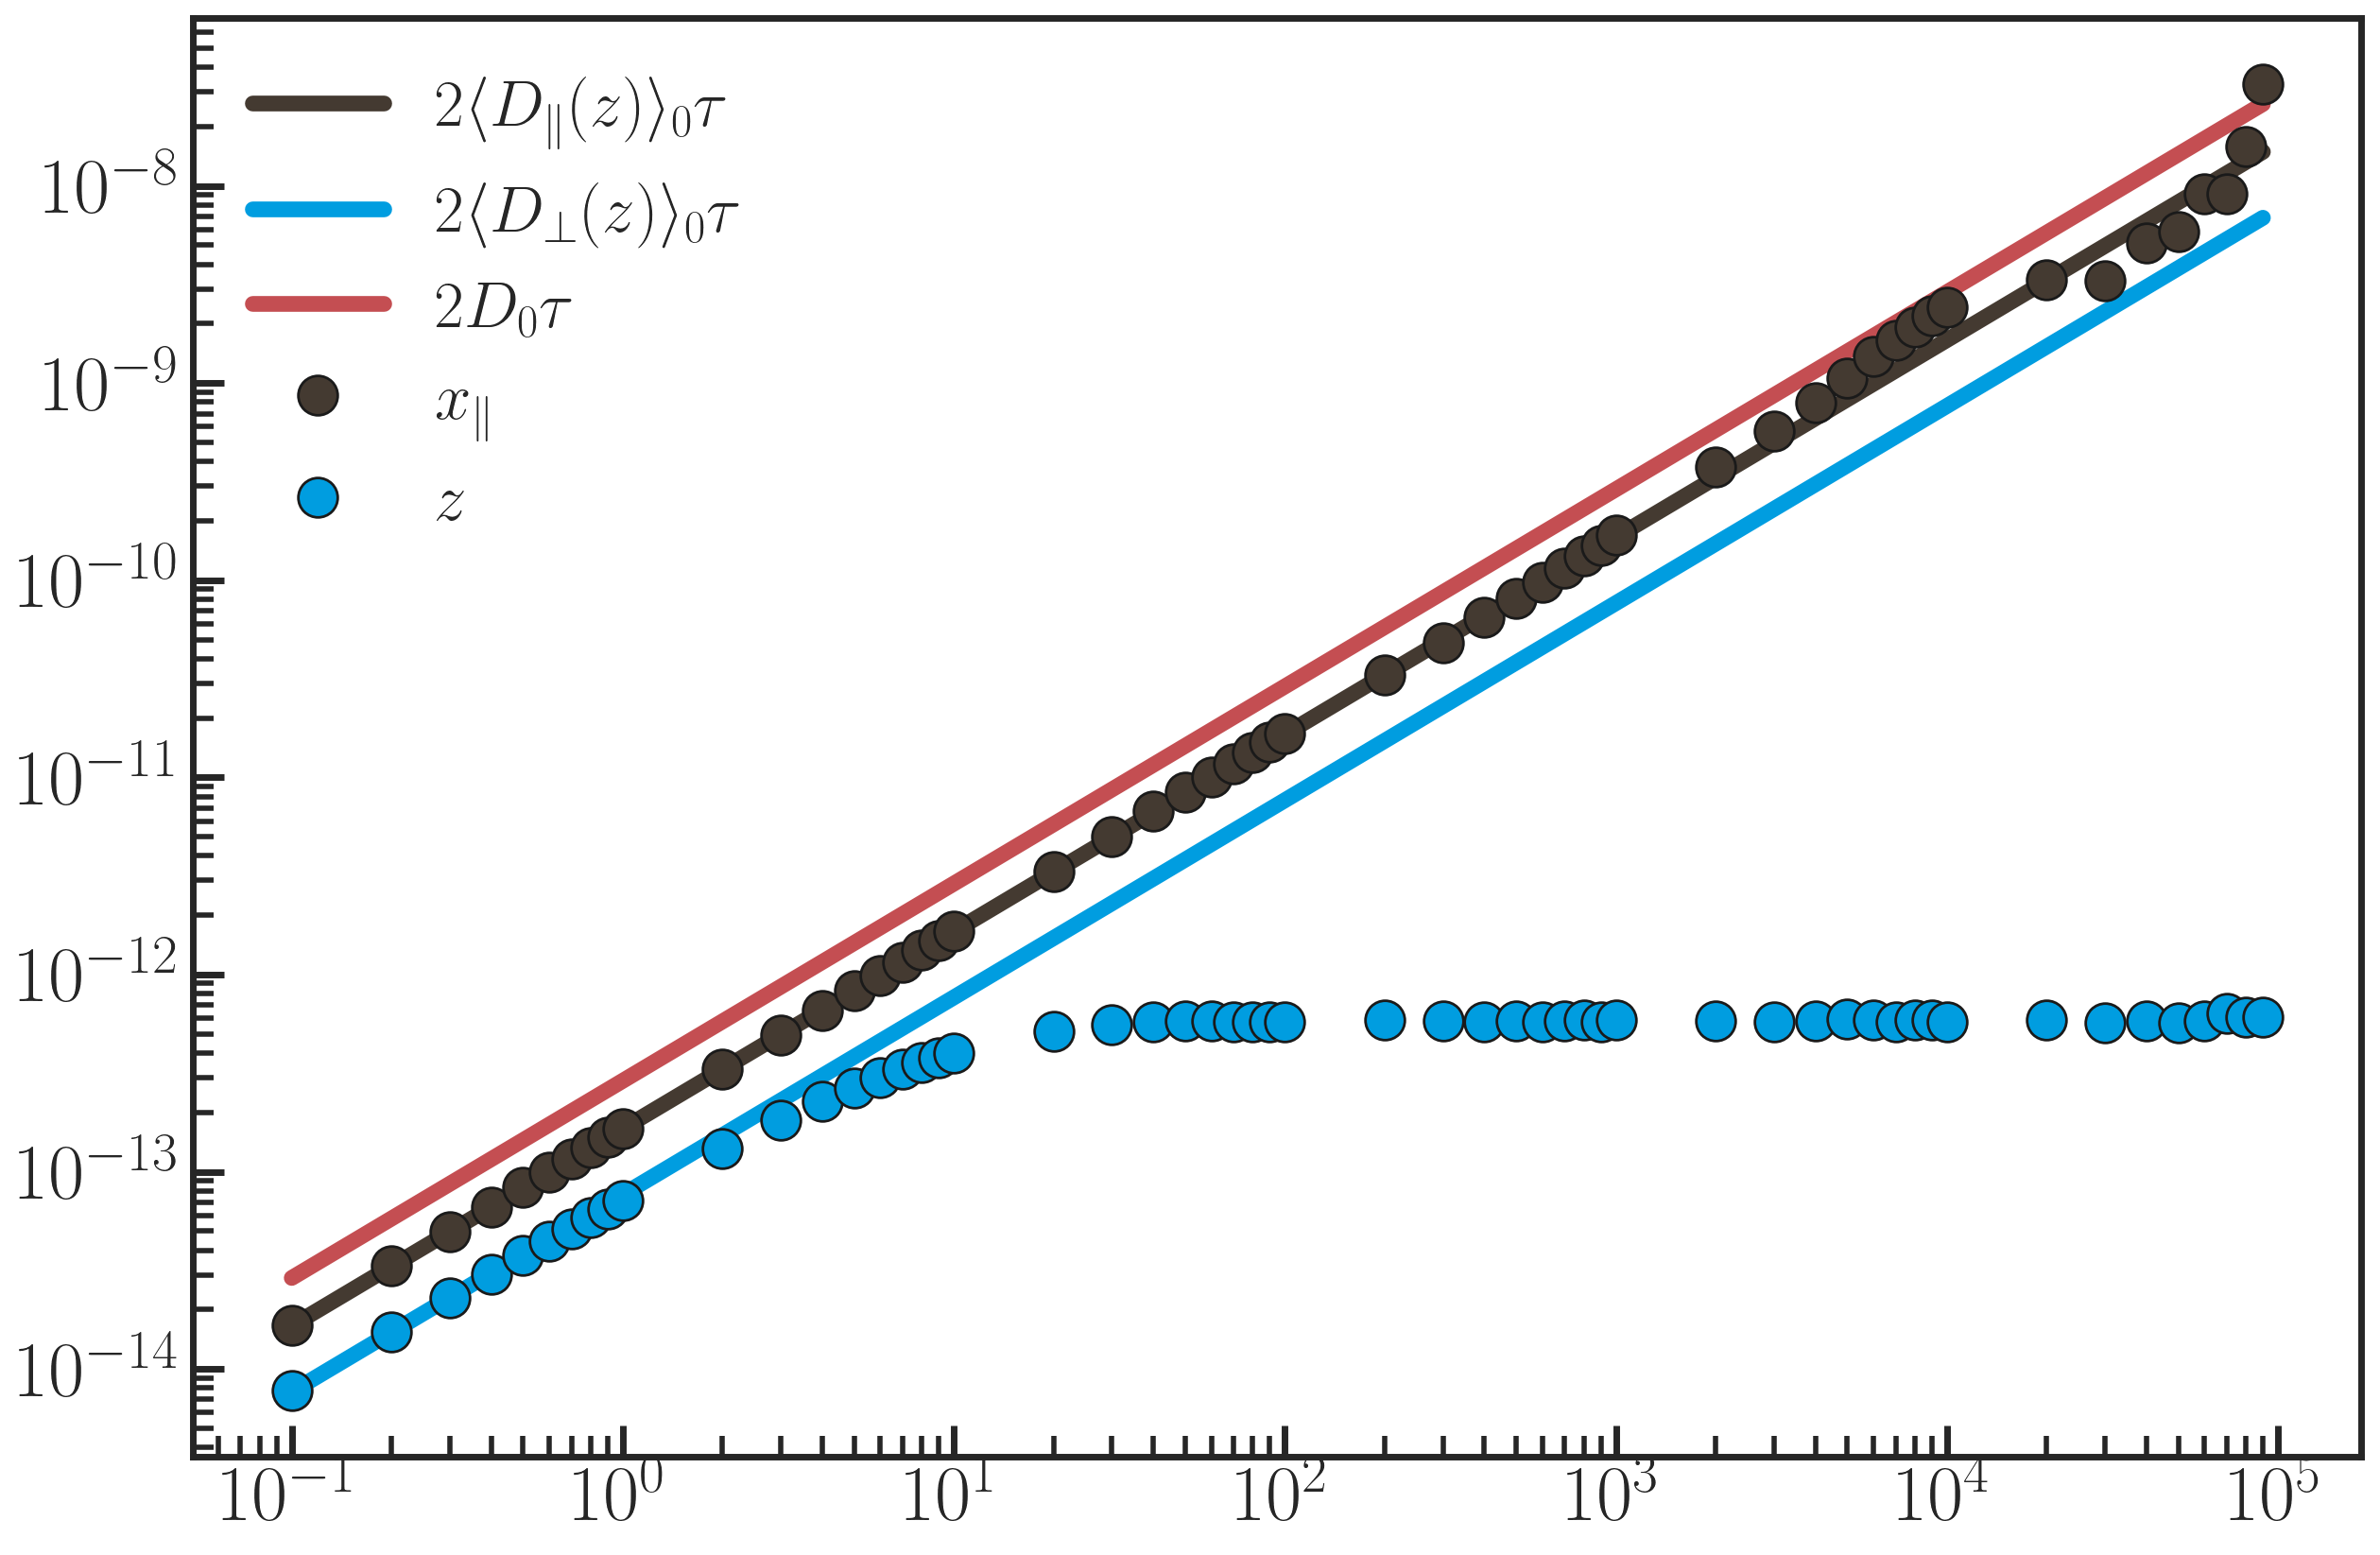

In [20]:
fig = plt.figure(figsize=(37*0.4, 25.2*0.4))

plt.plot(tau_x, 2*tau_x*mean_Dx, "-", label=r"$2 \langle D_{\|}(z) \rangle_0 \tau$", color="#443A31",linewidth=6)
plt.plot(tau_z, 2*tau_z*mean_Dz, "-", label=r"$2 \langle D_{\perp}(z) \rangle_0 \tau$", color="#009de0ff",linewidth=6)
plt.plot(tau_z, 2*D_0(tau_z)*tau_z, "-", label=r"$2 D_0 \tau$", color="r",linewidth=6)

plt.loglog(tau_x, msd_x, "o", label=r"$x_\|$", color="#443A31", markersize=15)
plt.loglog(tau_z, msd_z, "o", label=r"$z$", color="#009de0ff", markersize=15)

plt.tick_params(labelsize=30)
plt.legend(loc='upper left', frameon=False, fontsize=25)



In [21]:
# PDF(z)
position = Rs[:, 2]
bins=150

hist_z, bin_edges = np.histogram(position[position < 30e-6], bins=bins, density=False)
binsPositions = (bin_edges[:-1] + bin_edges[1:]) / 2 
pdf = hist_z / np.trapz(hist_z, binsPositions*1e6)

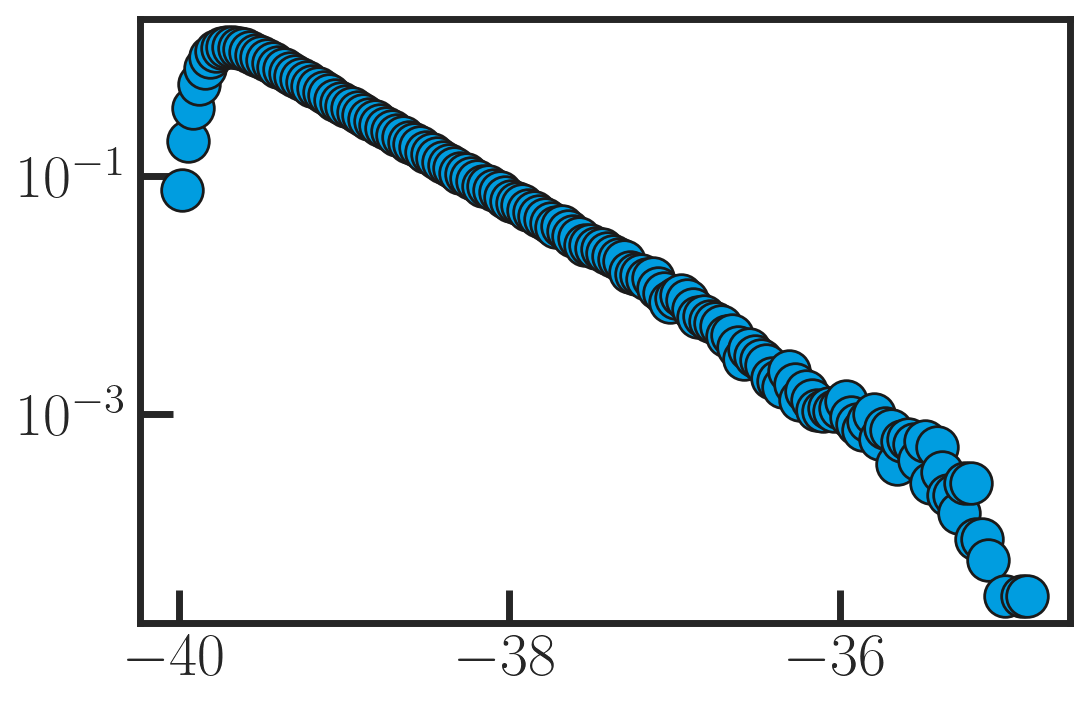

In [22]:
plt.semilogy(binsPositions*1e6, pdf, "o", label=r"$\mathrm{Simulation}$", color="#009de0ff", markersize=15)

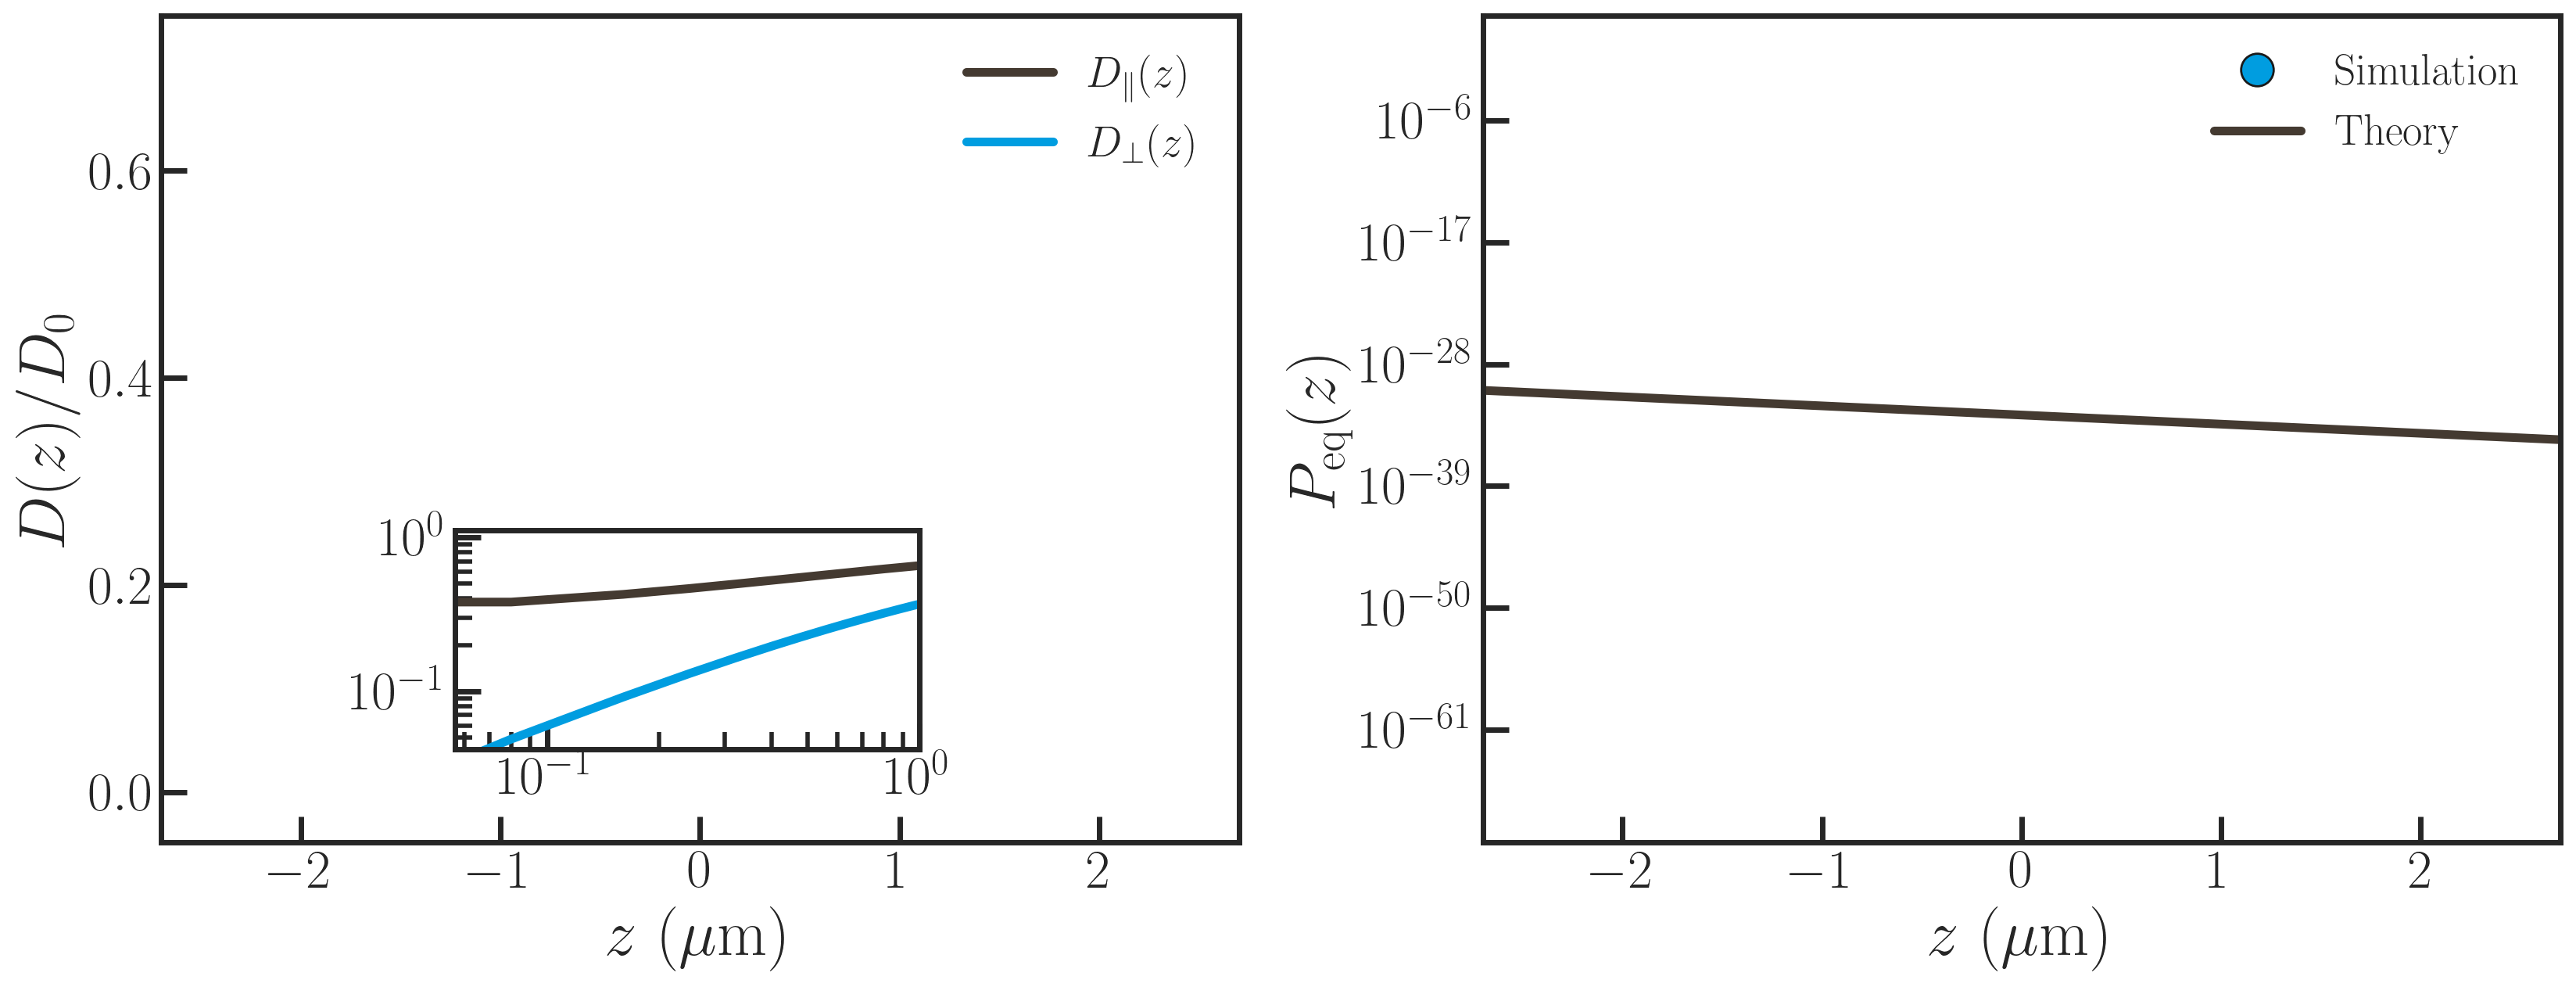

In [23]:
left, bottom, width, heigth = [0.22, 0.21, 0.15, 0.2]
xmin = -2.7
xmax = 2.7

z_theo=np.linspace(-H, H, 1000)

fig = plt.figure(figsize=(49.5*0.4, 17.5*0.4))
gs = fig.add_gridspec(1, 51)

ax0=fig.add_subplot(gs[0,:23])
ax0.plot(z*1e6, Dx/D0, label=r"$D_\|(z)$", color="#443A31", linewidth=4)
ax0.plot(z*1e6, Dz/D0, label=r"$D_\perp(z)$", color="#009de0ff", linewidth=4)
ax0.set_ylabel(r"$D(z)/D_0$", fontsize=30)
ax0.set_xlabel(r"$z$ ($\mu\mathrm{m}$)", fontsize=30)
ax0.axvspan(xmin, -H*1e6, color="black", alpha=0.5)
ax0.axvspan(+H*1e6, xmax, color="black", alpha=0.5)
ax0.set_xlim([xmin, xmax])
ax0.set_ylim([None, 0.75])
ax0.tick_params(labelsize = 25)
legend = ax0.legend(loc='upper right', shadow=False, frameon=False, fontsize=20)

ax2=fig.add_axes([left, bottom, width, heigth])
ax2.loglog((z+H)*1e6, Dx/D0, label=r"$D_\perp(z)$", color="#443A31", linewidth=4)
ax2.loglog((z+H)*1e6, Dz/D0, label=r"$D_\perp(z)$", color="#009de0ff", linewidth=4)
ax2.set_xlim([None, 1])
ax2.tick_params(labelsize=25)

ax1=fig.add_subplot(gs[0,28:])
ax1.semilogy(binsPositions*1e6, pdf, "o", label=r"$\mathrm{Simulation}$", color="#009de0ff", markersize=15)
ax1.plot(z_theo*1e6, P_eq(z)/np.trapz(P_eq(z_theo), z_theo*1e6), "#443A31", label=r"$\mathrm{Theory}$", linewidth=4)
ax1.set_ylabel(r"$P_\mathrm{eq}(z)$", fontsize=30)
ax1.set_xlabel(r"$z$ ($\mu\mathrm{m}$)", fontsize=30)
ax1.axvspan(xmin, -H*1e6, color="black", alpha=0.5)
ax1.axvspan(+H*1e6, xmax, color="black", alpha=0.5)
ax1.set_xlim([xmin, xmax])
ax1.tick_params(labelsize=25)
legend = ax1.legend(loc='upper right', shadow=False, frameon=False, fontsize=20)

plt.savefig("Dxyz_&_Pz.svg", transparent=True)

In [24]:
# calcul du plateau de la msd
def _Pdeltaz_long(dZ):
    z = np.linspace(-H, +H, 1000)
    dP = P_eq(z) * P_eq(z + dZ)
    P = trapz(dP,z)
    return P

def Pdeltaz_long(dZ):
    pdf = np.array([_Pdeltaz_long(i) for i in dZ])
    pdf = pdf / trapz(pdf,dZ)
    return pdf

h = H-H*1e-6
dZ_theo = np.linspace(-2*H, 2*H, 1000)
PdZ = Pdeltaz_long(dZ_theo)
plateau = np.trapz(dZ_theo**2 * PdZ, dZ_theo)
plateau, 2*lB**2

/tmp/ipykernel_279795/2816294363.py:109: RuntimeWarning: overflow encountered in exp
  P_eq = lambda z: np.exp(-B*np.exp(-H/lD)*(np.exp(-z/lD) + np.exp(z/lD)) - z/lB)


(5.736126511497347e-13, 5.53352e-13)

In [174]:
 Delta_x, pdf_Delta_x, dt = (np.array([-8.98109602e-07, -8.61452067e-07, -8.24794532e-07, -7.88136997e-07,
        -7.51479463e-07, -7.14821928e-07, -6.78164393e-07, -6.41506858e-07,
        -6.04849324e-07, -5.68191789e-07, -5.31534254e-07, -4.94876719e-07,
        -4.58219185e-07, -4.21561650e-07, -3.84904115e-07, -3.48246580e-07,
        -3.11589046e-07, -2.74931511e-07, -2.38273976e-07, -2.01616441e-07,
        -1.64958906e-07, -1.28301372e-07, -9.16438369e-08, -5.49863021e-08,
        -1.83287674e-08,  1.83287674e-08,  5.49863021e-08,  9.16438369e-08,
         1.28301372e-07,  1.64958906e-07,  2.01616441e-07,  2.38273976e-07,
         2.74931511e-07,  3.11589046e-07,  3.48246580e-07,  3.84904115e-07,
         4.21561650e-07,  4.58219185e-07,  4.94876719e-07,  5.31534254e-07,
         5.68191789e-07,  6.04849324e-07,  6.41506858e-07,  6.78164393e-07,
         7.14821928e-07,  7.51479463e-07,  7.88136997e-07,  8.24794532e-07,
         8.61452067e-07,  8.98109602e-07]),
np.array([6.35120929e-04, 4.06762842e-03, 1.63989651e-02, 1.15955955e-01,
        4.74913459e-01, 2.01540284e+00, 7.88243590e+00, 2.95250094e+01,
        1.03131779e+02, 3.35439783e+02, 1.01717581e+03, 2.88114895e+03,
        7.60505541e+03, 1.87311062e+04, 4.29818671e+04, 9.18589315e+04,
        1.82733974e+05, 3.38012865e+05, 5.81004234e+05, 9.26958788e+05,
        1.37125974e+06, 1.87892250e+06, 2.38194792e+06, 2.79139582e+06,
        3.02194164e+06, 3.02191534e+06, 2.79140837e+06, 2.38201053e+06,
        1.87892218e+06, 1.37127307e+06, 9.26974471e+05, 5.80993088e+05,
        3.38012689e+05, 1.82722211e+05, 9.18537698e+04, 4.29871300e+04,
        1.87332811e+04, 7.60809241e+03, 2.87916060e+03, 1.01778678e+03,
        3.35612378e+02, 1.02935212e+02, 2.96843748e+01, 7.90233874e+00,
        2.02487970e+00, 4.54689496e-01, 9.79228022e-02, 2.32211630e-02,
        4.09617319e-03, 6.06576169e-04]),
 0.1)
 

In [173]:
Delta_z, pdf_Delta_z, dt = (np.array([-8.98109602e-07, -8.61452067e-07, -8.24794532e-07, -7.88136997e-07,
        -7.51479463e-07, -7.14821928e-07, -6.78164393e-07, -6.41506858e-07,
        -6.04849324e-07, -5.68191789e-07, -5.31534254e-07, -4.94876719e-07,
        -4.58219185e-07, -4.21561650e-07, -3.84904115e-07, -3.48246580e-07,
        -3.11589046e-07, -2.74931511e-07, -2.38273976e-07, -2.01616441e-07,
        -1.64958906e-07, -1.28301372e-07, -9.16438369e-08, -5.49863021e-08,
        -1.83287674e-08,  1.83287674e-08,  5.49863021e-08,  9.16438369e-08,
         1.28301372e-07,  1.64958906e-07,  2.01616441e-07,  2.38273976e-07,
         2.74931511e-07,  3.11589046e-07,  3.48246580e-07,  3.84904115e-07,
         4.21561650e-07,  4.58219185e-07,  4.94876719e-07,  5.31534254e-07,
         5.68191789e-07,  6.04849324e-07,  6.41506858e-07,  6.78164393e-07,
         7.14821928e-07,  7.51479463e-07,  7.88136997e-07,  8.24794532e-07,
         8.61452067e-07,  8.98109602e-07]),
 np.array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.06116451e-02,
        1.87809275e-01, 7.95368069e-01, 7.02693034e+00, 3.69756879e+01,
        1.73888649e+02, 7.16002227e+02, 2.72367024e+03, 9.33134863e+03,
        2.89119552e+04, 8.08095093e+04, 2.02981867e+05, 4.58170697e+05,
        9.24755102e+05, 1.65529884e+06, 2.61100278e+06, 3.58929210e+06,
        4.23285961e+06, 4.11947602e+06, 3.42162217e+06, 2.50025784e+06,
        1.62311721e+06, 9.42308267e+05, 4.91115577e+05, 2.30673461e+05,
        9.78413855e+04, 3.74643646e+04, 1.30004983e+04, 4.04407960e+03,
        1.15092438e+03, 2.93975584e+02, 6.82938531e+01, 1.19076134e+01,
        2.26971299e+00, 6.41246556e-01, 2.96452308e-02, 1.01063287e-02,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00]), 0.1)

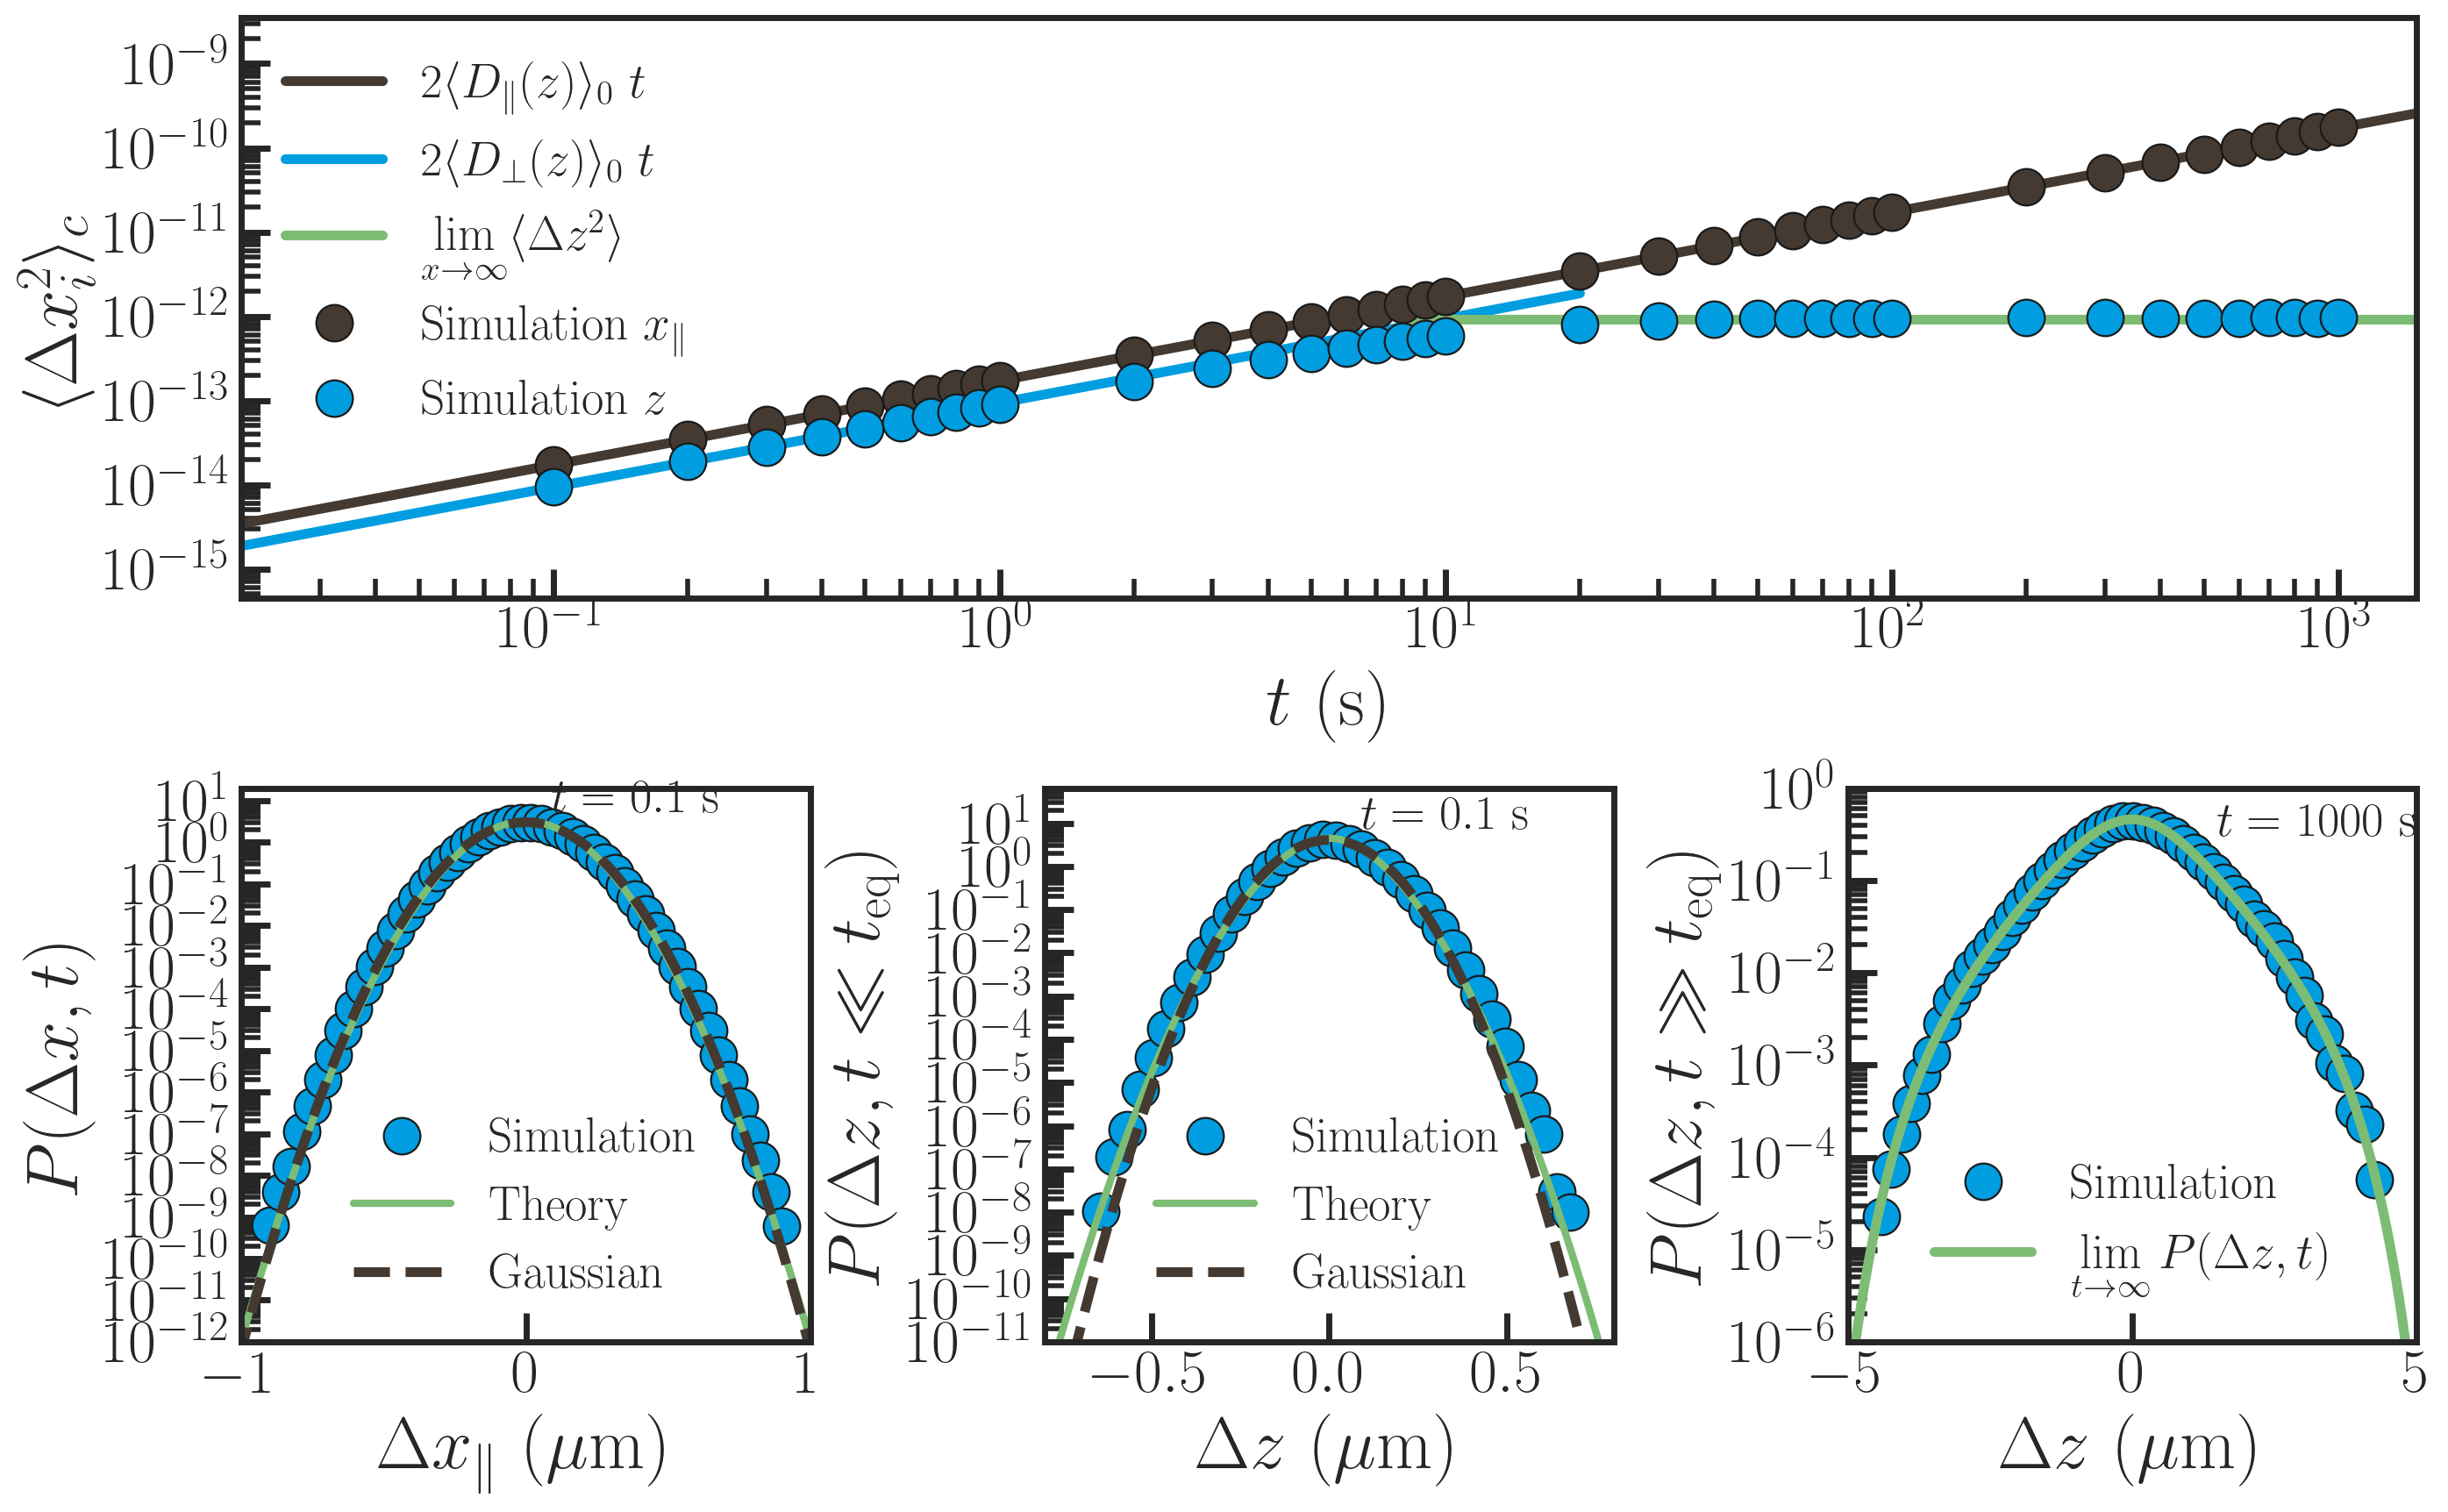

In [294]:

dXX = np.linspace(-1.4, +1.4, 1000)
theory_x = P_Dz_short_time(dXX*1e-6, dt*N_tau, D_para)
tauX_theo = np.linspace(1e-2, 1e4, 1000)

dZZ = np.linspace(-1, 1, 1000)
theory = P_Dz_short_time(dZZ*1e-6, dt*N_tau, D_perp)
tauZ_theo = np.linspace(1e-2, 20, 1000)

mpl.rcParams["lines.markeredgewidth"] = 0.8

fig = plt.figure(figsize=(40*0.4, 25*0.4),)
gs = fig.add_gridspec(50, 11,)

###################################
ax0=fig.add_subplot(gs[:22,:])
ax0.plot(tauX_theo, 2*tauX_theo*mean_Dx, "-", label=r"$2 \langle D_{\|}(z) \rangle_0 ~t$", color="#443A31",linewidth=4)
ax0.plot(tauZ_theo, 2*tauZ_theo*mean_Dz, "-", label=r"$2 \langle D_{\perp}(z) \rangle_0 ~t$", color="#009de0ff",linewidth=4)
ax0.plot(np.linspace(8, 1e5, 1000), plateau*np.ones(1000), "-", color="#7dbc74", label=r"$\lim\limits_{x \to \infty} \langle \Delta z^2 \rangle$", linewidth=4)
ax0.loglog(tau_x[:-17], msd_x[:-17], "o", label=r"Simulation $x_\|$", color="#443A31", markersize=15)
ax0.loglog(tau_z[:-17], msd_z[:-17], "o", label=r"Simulation $z$", color="#009de0ff", markersize=15)
ax0.set_ylabel(r"$\langle \Delta x^2_i \rangle_c$", fontsize=30)
ax0.set_xlabel(r"$t$ ($\mathrm{s}$)", fontsize=30)
ax0.set_xlim([0.2e-1, 1.5e3])
ax0.tick_params(labelsize = 25)
legend = ax0.legend(loc='upper left', shadow=False, frameon=False, fontsize=20)
locmaj = mpl.ticker.LogLocator(base=10.0, subs=(1.0, ), numticks=100)
ax0.yaxis.set_major_locator(locmaj)
locmin = mpl.ticker.LogLocator(base=10.0, subs=np.arange(2, 10) * .1,numticks=100)
ax0.yaxis.set_minor_locator(locmin)
ax0.yaxis.set_minor_formatter(mpl.ticker.NullFormatter())


###################################
ax1=fig.add_subplot(gs[29:,:3])
ax1.semilogy(Delta_x*1e6, pdf_Delta_x/np.trapz(pdf_Delta_x,Delta_x*1e6), "o", color="#009de0ff", markersize=15, label=r"Simulation")
ax1.plot(dXX, theory_x/np.trapz(theory_x,dXX), "-", color="#7dbc74",  label="Theory")
ax1.plot(dXX, gauss(dXX*1e-6, 0, np.sqrt(2*mean_Dx*dt*N_tau)) / np.trapz(gauss(dXX*1e-6, 0, np.sqrt(2*mean_Dx*dt*N_tau)), dXX), "--", color="#443A31",linewidth=4, label=r"Gaussian")
ax1.text(0.09, 5, r"$t =  "+str(N_tau*dt)+" ~\mathrm{s}$", fontsize=20)
ax1.set_xlim([-1, 1])
ax1.set_ylim([1e-12, 20])
ax1.set_ylabel(r"$P(\Delta x, t)$", fontsize=30)
ax1.set_xlabel(r"$\Delta x_\|$ $(\mu \mathrm{m})$", fontsize=30)
ax1.tick_params(labelsize = 25)
legend = ax1.legend(loc='lower center', shadow=False, frameon=False, fontsize=20)
locmaj = mpl.ticker.LogLocator(base=10.0, subs=(1.0, ), numticks=100)
ax1.yaxis.set_major_locator(locmaj)
locmin = mpl.ticker.LogLocator(base=10.0, subs=np.arange(2, 10) * .1,numticks=100)
ax1.yaxis.set_minor_locator(locmin)
ax1.yaxis.set_minor_formatter(mpl.ticker.NullFormatter())

###################################
ax2=fig.add_subplot(gs[29:,4:7])
ax2.semilogy(Delta_z*1e6, pdf_Delta_z/np.trapz(pdf_Delta_z,Delta_z*1e6), "o", color="#009de0ff", markersize=15, label=r"Simulation")
ax2.plot(dZZ, theory/np.trapz(theory,dZZ), "-",color="#7dbc74", label="Theory")
ax2.plot(dZZ, gauss(dZZ*1e-6, 0, std_num_dZ) / np.trapz(gauss(dZZ*1e-6, 0, std_num_dZ), dZZ), "--", color="#443A31",linewidth=4, label=r"Gaussian")
ax2.text(0.09, 7, r"$t =  "+str(N_tau*dt)+" ~\mathrm{s}$", fontsize=20)
ax2.set_xlim([-0.8, 0.8])
ax2.set_ylim([1e-11, None])
ax2.set_ylabel(r"$P(\Delta z, t\ll t_\mathrm{eq})$", fontsize=30)
ax2.set_xlabel(r"$\Delta z$ $(\mu \mathrm{m})$", fontsize=30)
ax2.tick_params(labelsize = 25)
legend = ax2.legend(loc='lower center', shadow=False, frameon=False, fontsize=20)
locmaj = mpl.ticker.LogLocator(base=10.0, subs=(1.0, ), numticks=100)
ax2.yaxis.set_major_locator(locmaj)
locmin = mpl.ticker.LogLocator(base=10.0, subs=np.arange(2, 10) * .1,numticks=100)
ax2.yaxis.set_minor_locator(locmin)
ax2.yaxis.set_minor_formatter(mpl.ticker.NullFormatter())

###################################
ax3=fig.add_subplot(gs[29:,8:])
ax3.semilogy(binsPositions_dZ_long*1e6, pdf_dZ_long/np.trapz(pdf_dZ_long, binsPositions_dZ_long*1e6), "o", color="#009de0ff", markersize=15, label=r"Simulation")
ax3.semilogy(dZ*1e6, Pdeltaz_long(dZ)/np.trapz(Pdeltaz_long(dZ), dZ*1e6), "-",  color="#7dbc74", linewidth=4, label=r"$\lim\limits_{t \to \infty} P(\Delta z, t)$")
ax3.text(1.5, 0.3,r"$t =  "+str(int(N_tau_long*dt))+" ~\mathrm{s}$", fontsize=20)
ax3.set_ylabel(r"$P(\Delta z, t\gg t_\mathrm{eq})$", fontsize=30)
ax3.set_xlabel(r"$\Delta z$ $(\mu \mathrm{m})$", fontsize=30)
ax3.tick_params(labelsize = 25)
ax3.set_xlim([-5, 5])
ax3.set_ylim([1e-6, 1])
legend = ax3.legend(loc='lower center', shadow=False, frameon=False, fontsize=20)
locmaj = mpl.ticker.LogLocator(base=10.0, subs=(1.0, ), numticks=100)
ax3.yaxis.set_major_locator(locmaj)
locmin = mpl.ticker.LogLocator(base=10.0, subs=np.arange(2, 10) * .1,numticks=100)
ax3.yaxis.set_minor_locator(locmin)
ax3.yaxis.set_minor_formatter(mpl.ticker.NullFormatter())

plt.savefig("non_gaussianity.svg", transparent=True)

In [186]:
tau_theo = np.linspace(1e-2, 20, 1000)

In [26]:
A4_theo = C4_court(Dpara=D_para, Peq=P_eq, kBT=kBT, hmin=-H+H*1e-5, hmax=+H-H*1e-5, dx=1e-8)
A4_theo

A4_theo_z = C4_court(Dpara=D_perp, Peq=P_eq, kBT=kBT, hmin=-H+H*1e-5, hmax=+H-H*1e-5, dx=1e-8)
A4_theo, A4_theo_z

(2.335706168867776e-27, 4.063937162518937e-27)

In [32]:
D4_theo = C4_long(Dpara=D_para, Dperp=D_perp, Peq=P_eq, H=H, dx=1e-7, )
D4_theo

193382687582262.66

In [363]:
Dt_x, C4_x = (np.array([0.01, 0.03, 0.04, 0.05, 1.0000e-01, 3.0000e-01, 4.0000e-01, 5.0000e-01, 1.0000e+00,
        1.3000e+00, 1.6000e+00, 2.6000e+00, 3.3000e+00, 5.4000e+00,
        8.6000e+00, 1.3800e+01, 2.2200e+01, 2.8100e+01, 3.5500e+01,
        5.6800e+01, 7.1900e+01, 9.1000e+01, 1.8420e+02, 2.3290e+02,
        2.9470e+02, 3.7270e+02, 4.7140e+02, 7.5430e+02, 1.5264e+03,
        2.4420e+03, 3.0888e+03, 6.2505e+03, 7.9060e+03, 1.0000e+04]),
 [9.908066271909657e-32,
  8.82153591833266e-31,
  1.5750179434330201e-30,
  2.484284847556814e-30,
  9.940763020591201e-30,
  8.791498736014455e-29,
  1.5670557052883217e-28,
  2.4365181034963012e-28,
  9.506450498651222e-28,
  1.6131977424566291e-27,
  2.4183908566413972e-27,
  6.0397435424158495e-27,
  9.351991247842877e-27,
  2.2478823879522269e-26,
  4.9494790740520164e-26,
  1.0492468937976885e-25,
  2.0956311667157406e-25,
  2.878730463673414e-25,
  3.931079050633726e-25,
  6.943914708876457e-25,
  9.065345340127836e-25,
  1.1841721455894024e-24,
  2.1906621766809948e-24,
  2.583219696236077e-24,
  3.0127773039697552e-24,
  4.837636888960394e-24,
  8.538215428761128e-24,
  7.825119903841582e-24,
  -9.716358618623193e-24,
  1.956021334842536e-22,
  2.1984296826349175e-22,
  -4.157166281415382e-22,
  3.03195117891359e-21,
  np.nan])



In [364]:
Dt_z, C4_z = (np.array([0.01, 0.03, 0.04, 0.05, 1.0000e-01, 3.0000e-01, 4.0000e-01, 5.0000e-01, 1.0000e+00,
        1.3000e+00, 1.6000e+00, 2.6000e+00, 3.3000e+00, 5.4000e+00,
        8.6000e+00, 1.3800e+01, 2.2200e+01, 2.8100e+01, 3.5500e+01,
        5.6800e+01, 7.1900e+01, 9.1000e+01, 1.8420e+02, 2.3290e+02,
        2.9470e+02, 3.7270e+02, 4.7140e+02, 7.5430e+02, 1.5264e+03,
        2.4420e+03, 3.0888e+03, 6.2505e+03, 7.9060e+03, 1.0000e+04]),
 [1.8148283109529796e-29,
  1.5747673427044405e-28,
  2.777760058341669e-28,
  4.305402065223981e-28,
  1.656793501575856e-27,
  2.7606094541986627e-27,
  4.125176685084375e-27,
  1.0441464626649322e-26,
  1.6365006260383524e-26,
  4.077223994388704e-26,
  9.149940938781592e-26,
  1.8554459080602042e-25,
  3.1035830966278854e-25,
  3.6691299994573685e-25,
  4.098065458594404e-25,
  4.5318307593088375e-25,
  4.527208567526357e-25,
  4.35753689185392e-25,
  1.2145415159720604e-25,
  -2.381143410510063e-25,
  -8.60211409018589e-25,
  -1.9600045179521526e-24,
  -3.906079580666042e-24,
  -1.2316436837178852e-23,
  -5.258745097985626e-23,
  -1.3460288013572492e-22,
  -2.153488766898982e-22,
  -8.818456003948998e-22,
  -1.4108363916760963e-21,
  np.nan])

In [375]:
#Save data C4 x et z

# datafile = 'C4_Datas/Datas_x&z_Poster/C4x_lD_{:e}_lB_{:e}_B_{:e}_H_{:e}_a_{:e}_dt_{:e}_Nt_{}_Ntsub_{}_'.format(lD, lB, B, H, a, dt, Nt, Nt_sub).replace(".", "p") + ".csv"
# csvfile = open(datafile,'a', newline='')
# writer = csv.writer(csvfile)
# writer.writerow(C4_x)

# datafile = 'C4_Datas/Datas_x&z_Poster/taux_lD_{:e}_lB_{:e}_B_{:e}_H_{:e}_a_{:e}_dt_{:e}_Nt_{}_Ntsub_{}_'.format(lD, lB, B, H, a, dt, Nt, Nt_sub).replace(".", "p") + ".csv"
# csvfile = open(datafile,'a', newline='')
# writer = csv.writer(csvfile)
# writer.writerow(Dt_x)

# datafile = 'C4_Datas/Datas_x&z_Poster/C4z_lD_{:e}_lB_{:e}_B_{:e}_H_{:e}_a_{:e}_dt_{:e}_Nt_{}_Ntsub_{}_'.format(lD, lB, B, H, a, dt, Nt, Nt_sub).replace(".", "p") + ".csv"
# csvfile = open(datafile,'a', newline='')
# writer = csv.writer(csvfile)
# writer.writerow(C4_z)

# datafile = 'C4_Datas/Datas_x&z_Poster/tauz_lD_{:e}_lB_{:e}_B_{:e}_H_{:e}_a_{:e}_dt_{:e}_Nt_{}_Ntsub_{}_'.format(lD, lB, B, H, a, dt, Nt, Nt_sub).replace(".", "p") + ".csv"
# csvfile = open(datafile,'a', newline='')
# writer = csv.writer(csvfile)
# writer.writerow(Dt_z)



In [98]:
# Calcul du plateau de C4 selon z
plateauC4 = np.trapz(dZ_theo**4 * PdZ, dZ_theo) - 3* (np.trapz(dZ_theo**2 * PdZ, dZ_theo))**2
plateauC4

4.67137377112548e-25

In [371]:
# Data experimentales
dossier = "C4_Datas_experimentales/"

fileC4 = dossier+"C4_ExpDatas_lD_8p806971e-08_lB_5p256932e-07_B_5p050285e+00.csv"
dataC4  = np.loadtxt(fileC4, delimiter= ",")

file_errC4 = dossier+"errC4_ExpDatas_lD_8p806971e-08_lB_5p256932e-07_B_5p050285e+00.csv"
data_errC4  = np.loadtxt(file_errC4, delimiter= ",")

file_tauC4 = dossier+"tauC4_ExpDatas_lD_8p806971e-08_lB_5p256932e-07_B_5p050285e+00.csv"
data_tauC4  = np.loadtxt(file_tauC4, delimiter= ",")


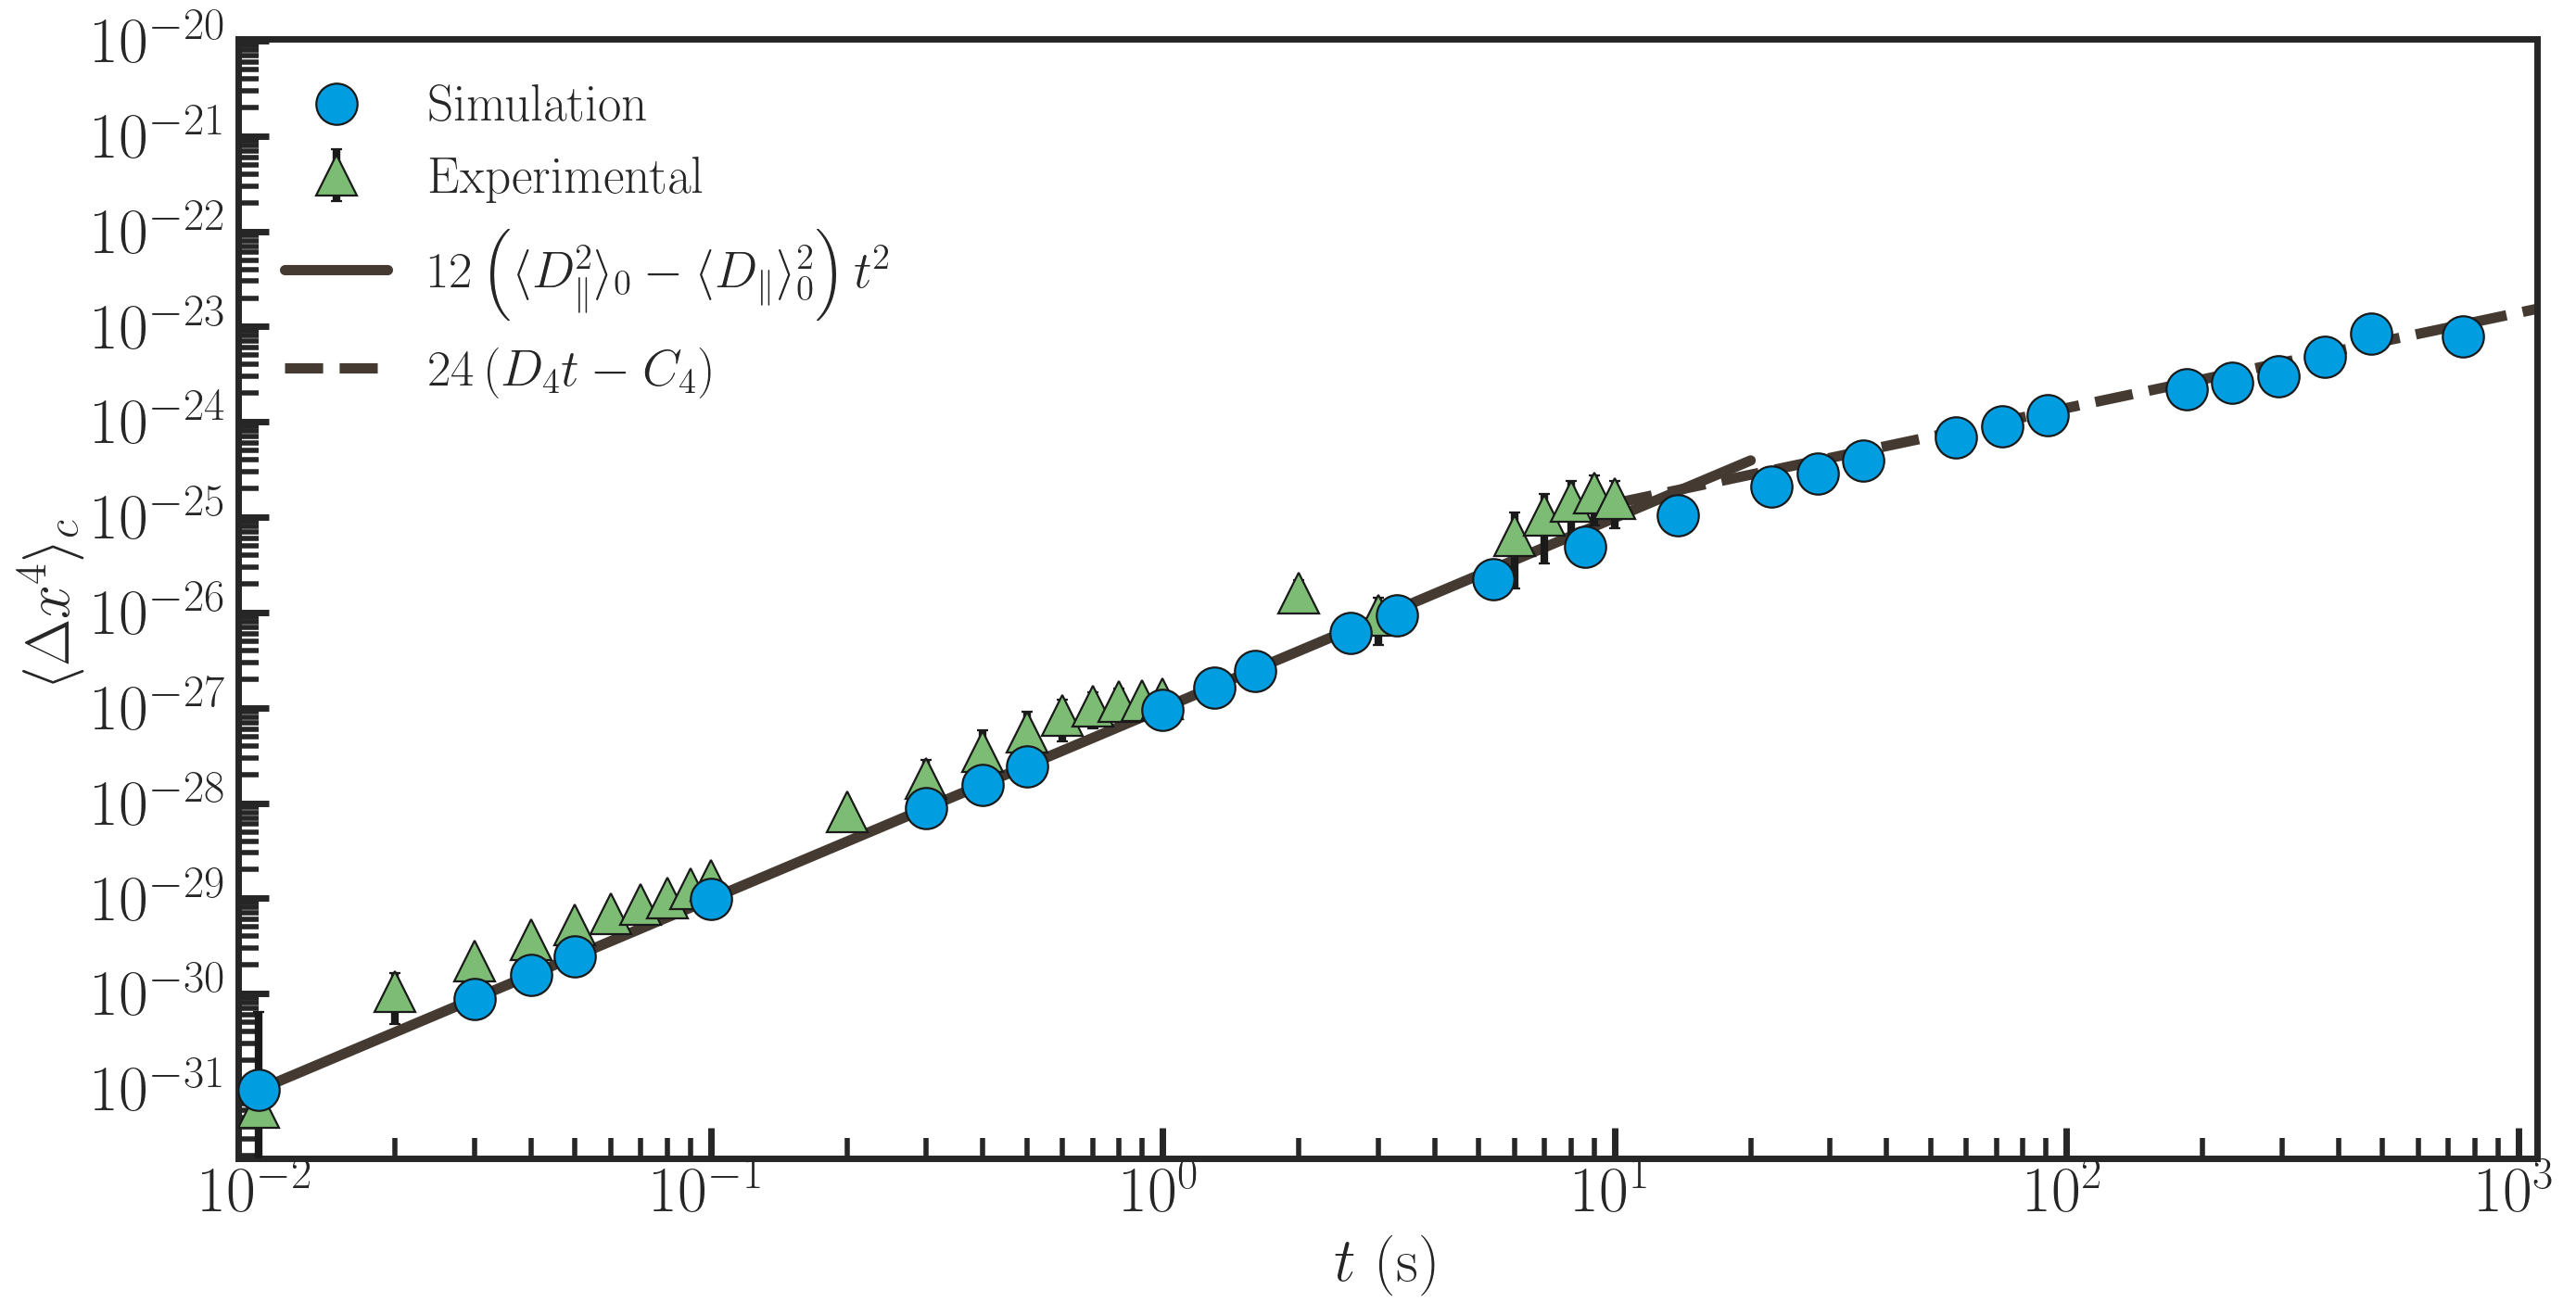

In [373]:
fig = plt.figure(figsize=(40*0.4, 20*0.4),)
plt.errorbar(data_tauC4, dataC4, yerr=24*data_errC4, 
             ls='', marker='^', markersize=16, color="#7dbc74", 
             ecolor='k', capsize=2, 
             label=r"Experimental",
             #label='Exp.', 
             zorder=99,
            )

plt.loglog(tau_theo, A4_theo*tau_theo**2, "-", color="#443A31", label=r"$12 \left ( \langle D_\|^2 \rangle_0 - \langle D_\| \rangle_0^2 \right )t^2$", linewidth=4, )#
plt.loglog(np.linspace(10, 1e5, 1000), D4_theo*np.linspace(10, 1e5, 1000), "--", color="#443A31", label=r"$24 \left( D_4 t-C_4 \right)$", linewidth=4, )# b24b90
plt.loglog(Dt_x, C4_x, "o", color="#009de0ff", markersize=16, label=r"Simulation",zorder=100,)

handles, labels = plt.gca().get_legend_handles_labels()
order = [2,3,0,1]



plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],loc='upper left', shadow=False, frameon=False, fontsize=20)
plt.xlim([0.9e-2, 1.1e3])
plt.xlabel(r"$t~(\mathrm{s})$")
plt.ylabel(r"$\langle \Delta x^4 \rangle_c$")

ax1 = plt.gca()
locmaj = mpl.ticker.LogLocator(base=10.0, subs=(1.0, ), numticks=100)
ax1.yaxis.set_major_locator(locmaj)
locmin = mpl.ticker.LogLocator(base=10.0, subs=np.arange(2, 10) * .1,numticks=100)
ax1.yaxis.set_minor_locator(locmin)
ax1.yaxis.set_minor_formatter(mpl.ticker.NullFormatter())
ax1.tick_params(labelsize = 25)

plt.savefig("C4_simu_plot.svg", transparent=True)

In [227]:
B_exp=5.050285e+00
lD_exp = 8.806971e-08
lB_exp = 5.256932e-07


P_eq_exp = lambda z: np.exp(-B_exp*np.exp(-H/lD_exp)*(np.exp(-z/lD_exp) + np.exp(z/lD_exp)) - z/lB_exp)

A4_theo_exp = C4_court(Dpara=D_para, Peq=P_eq_exp, kBT=kBT, hmin=-H+H*1e-5, hmax=+H-H*1e-5, dx=1e-8)
A4_theo_exp

1.4198142358865031e-27

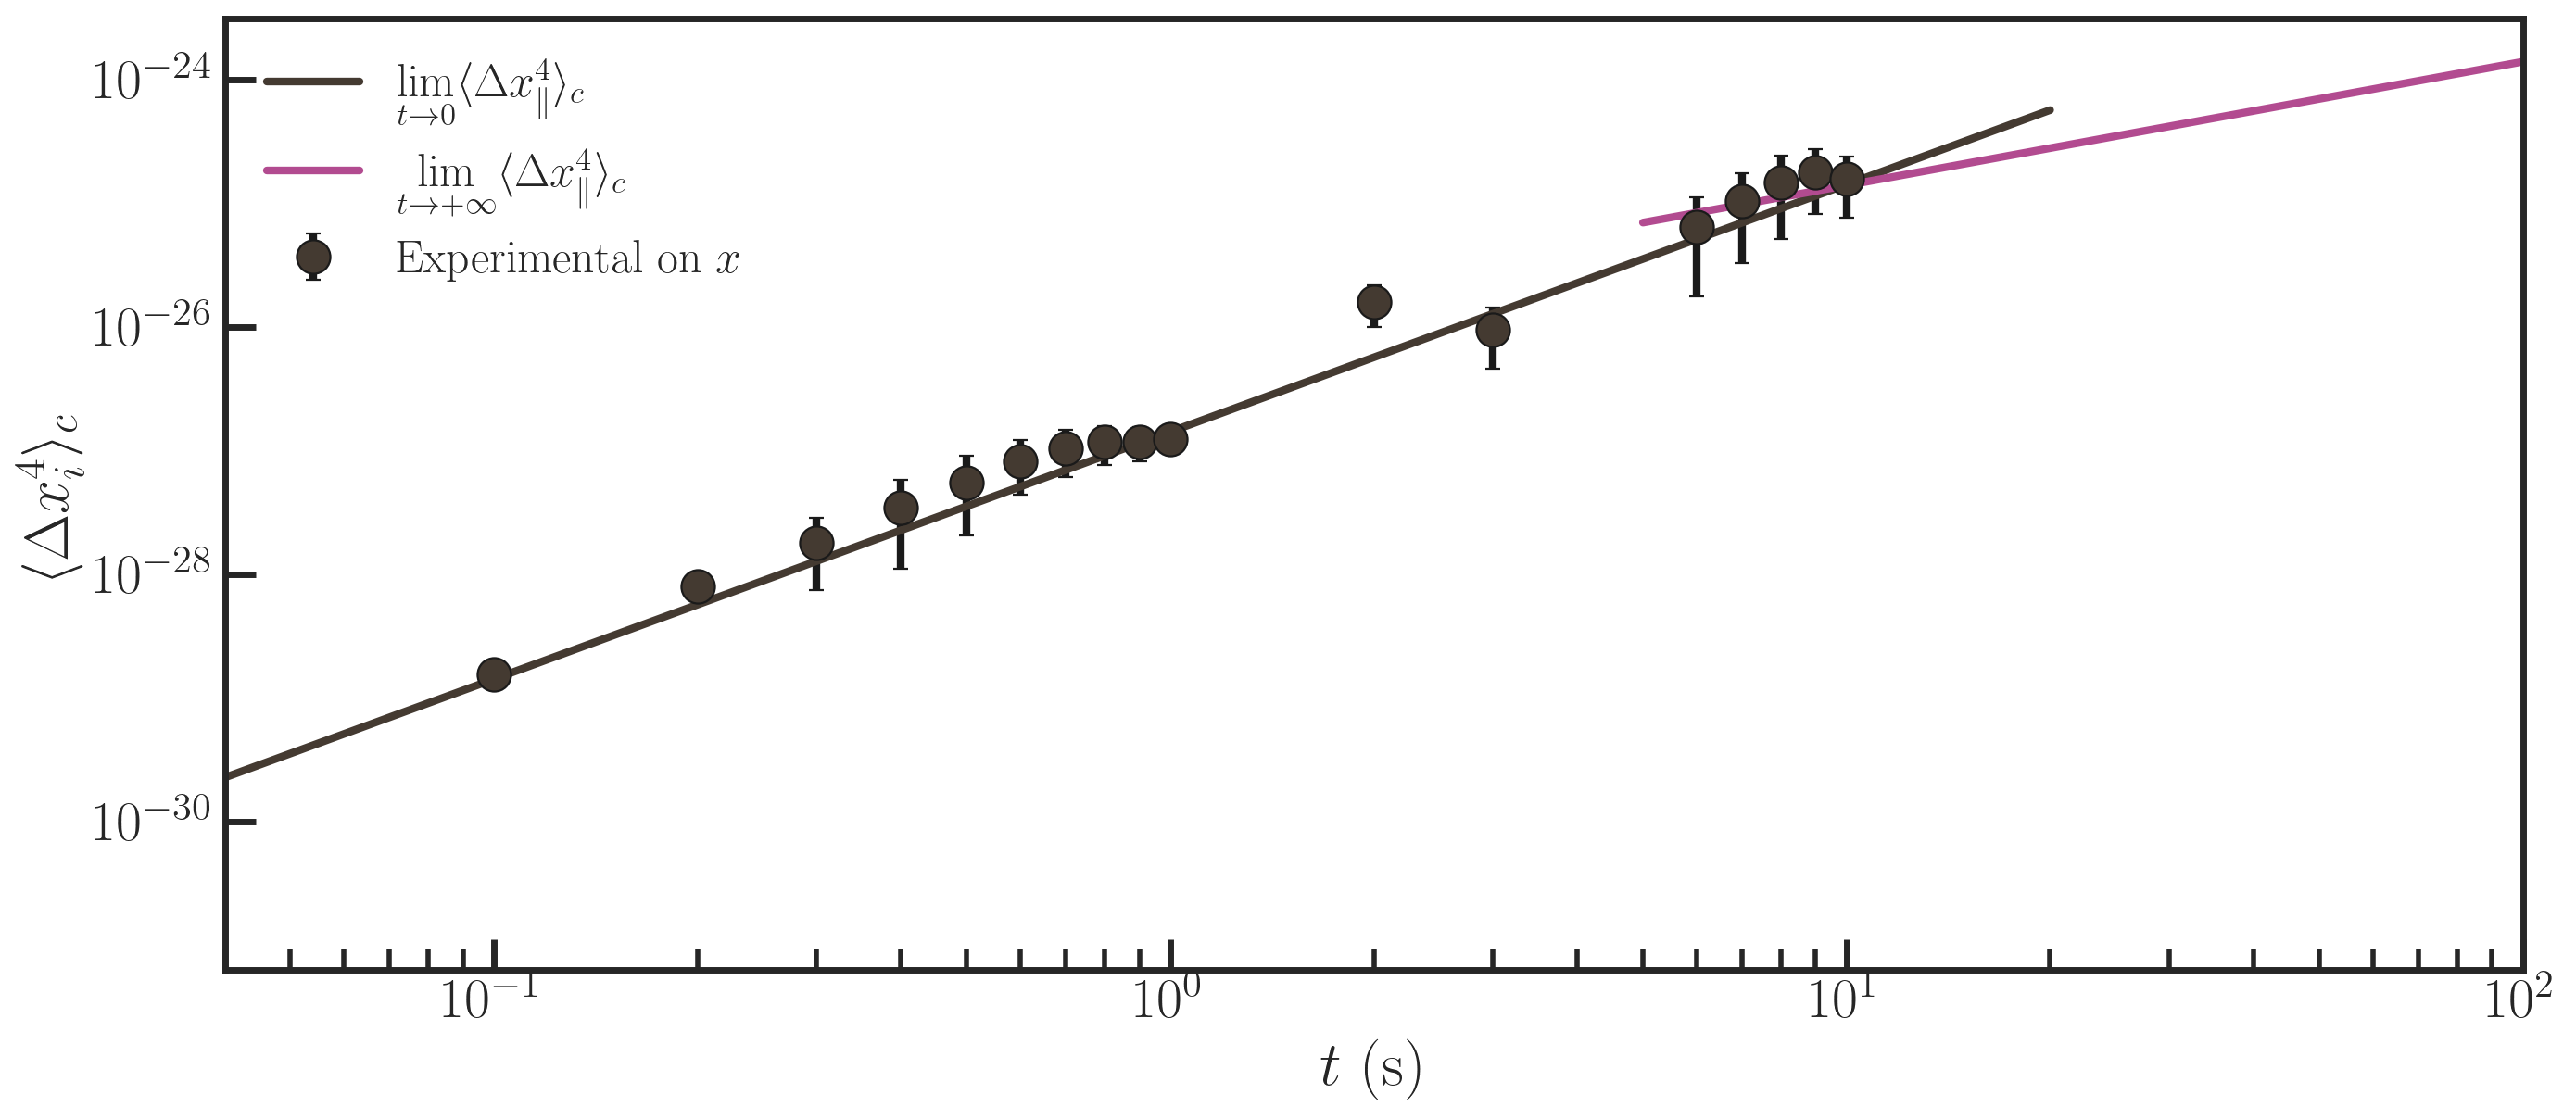

In [243]:
fig = plt.figure(figsize=(40*0.4, 17*0.4),)
plt.errorbar(data_tauC4[9:], dataC4[9:], yerr=24*data_errC4[9:], 
             ls='', marker='o', markersize=13, color="#443A31", 
             ecolor='k', capsize=3, 
             label=r"Experimental on $x$",
             #label='Exp.', 
            )

plt.loglog(tau_theo, A4_theo_exp*tau_theo**2, "-", color="#443A31", label=r"$\lim\limits_{t \to 0} \langle \Delta x_\|^4 \rangle_c$")
plt.loglog(np.linspace(5, 1e2, 1000), D4_theo*np.linspace(5, 1e2, 1000), "-", color="#b24b90", label=r"$\lim\limits_{t \to +\infty} \langle \Delta x_\|^4 \rangle_c$")

plt.legend(loc='upper left', shadow=False, frameon=False, fontsize=18)
plt.xlim([0.4e-1, 1e2])
plt.xlabel(r"$t~(\mathrm{s})$")
plt.ylabel(r"$\langle \Delta x_i^4 \rangle_c$")

plt.savefig("C4_exp_plot.svg", transparent=True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


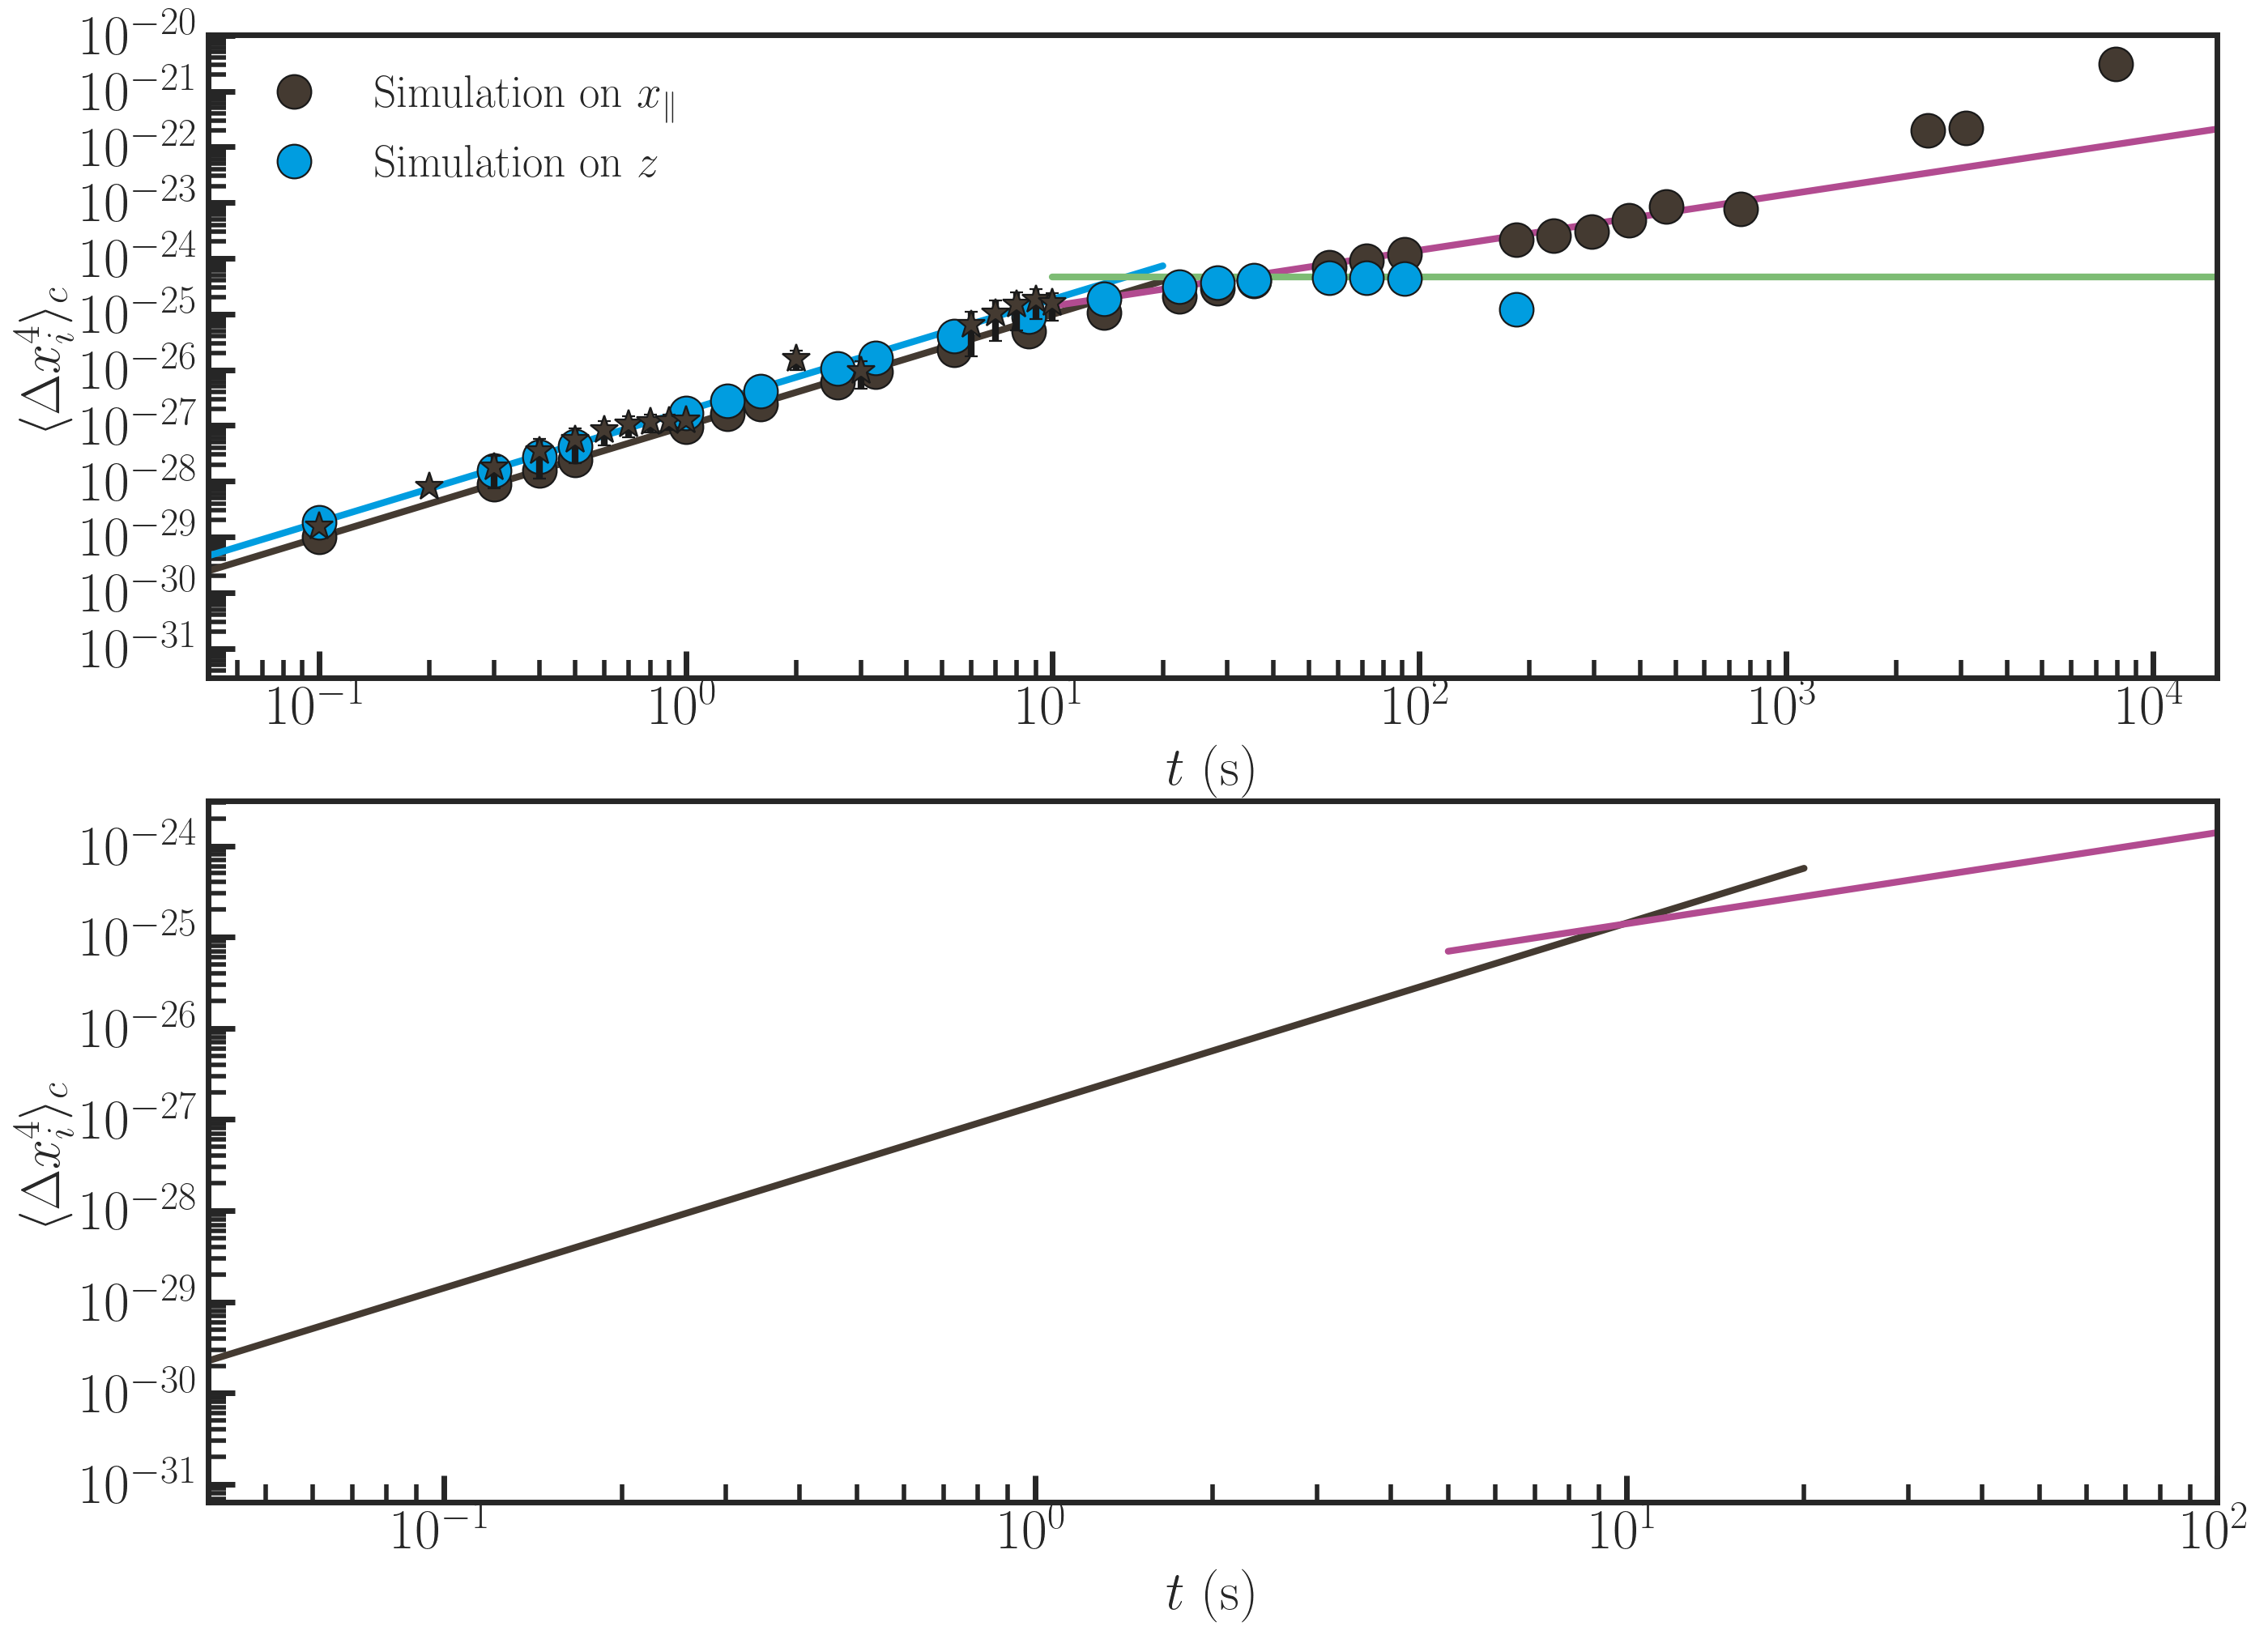

In [296]:
fig = plt.figure(figsize=(40*0.4, 30*0.4),)
gs = fig.add_gridspec(50, 40,)

ax0=fig.add_subplot(gs[:22,:])
ax0.loglog(tau_theo, A4_theo*tau_theo**2, "-", color="#443A31")#, label=r"$12 \left ( \langle D_\|^2 \rangle_0 - \langle D_\| \rangle_0^2 \right )t^2$"
ax0.loglog(tau_theo, A4_theo_z*tau_theo**2, "-", color="#009de0ff")#, label=r"$12 \left ( \langle D_\perp^2 \rangle_0 - \langle D_\perp \rangle_0^2 \right )t^2$"
ax0.loglog(np.linspace(10, 1e5, 1000), D4_theo*np.linspace(10, 1e5, 1000), "-", color="#b24b90")#, label=r"$24 \left( D_4 t-C_4 \right)$"
ax0.loglog(np.linspace(10, 1e5, 1000), plateauC4*np.ones(1000), "-", color="#7dbc74")#, label=r"$\lim\limits_{t \to +\infty} \langle \Delta z^4 \rangle_c$"
ax0.loglog(Dt_x, C4_x, "o", color="#443A31", markersize=15, label=r"Simulation on $x_\|$")
ax0.loglog(Dt_z, C4_z, "o", color="#009de0ff", markersize=15, label=r"Simulation on $z$")
ax0.legend(loc='upper left', shadow=False, frameon=False, fontsize=20)
ax0.set_xlim([0.5e-1, 1.5e4])
# ax0.set_ylim([None, 1e-16])The authors acknowledge funding from the Agence Nationale de la Recherche (ANR) under the EMetBrown (ANR-21-ERCC-0010-01),
and Softer (ANR-21-CE06-0029) grants. They also thank the Soft Matter Collaborative Research Unit, Frontier Research
Center for Advanced Material and Life Science, Faculty of Advanced Life Science at Hokkaido University, Sapporo, Japan.
ax0.set_xlabel(r"$t~(\mathrm{s})$")
ax0.set_ylabel(r"$\langle \Delta x_i^4 \rangle_c$")
locmaj = mpl.ticker.LogLocator(base=10.0, subs=(1.0, ), numticks=100)
ax0.yaxis.set_major_locator(locmaj)
locmin = mpl.ticker.LogLocator(base=10.0, subs=np.arange(2, 10) * .1,numticks=100)
ax0.yaxis.set_minor_locator(locmin)
ax0.yaxis.set_minor_formatter(mpl.ticker.NullFormatter())
ax0.tick_params(labelsize = 25)


ax1=fig.add_subplot(gs[26:,:])
ax0.errorbar(data_tauC4[9:], dataC4[9:], yerr=24*data_errC4[9:], 
             ls='', marker='*', markersize=13, color="#443A31", 
             ecolor='k', capsize=3, 
             label=r"Experimental on $x$",
             #label='Exp.', 
            )
ax1.loglog(tau_theo, A4_theo_exp*tau_theo**2, "-", color="#443A31")#, label=r"$12 \left ( \langle D_\|^2 \rangle_0 - \langle D_\| \rangle_0^2 \right )t^2$"
ax1.loglog(np.linspace(5, 1e2, 1000), D4_theo*np.linspace(5, 1e2, 1000), "-", color="#b24b90")#, label=r"$24 \left( D_4 t-C_4 \right)$"
ax1.legend(loc='upper left', shadow=False, frameon=False, fontsize=20)
ax1.set_xlim([0.4e-1, 1e2])
# ax1.set_ylim([1e-31, 1e-23])
ax1.set_xlabel(r"$t~(\mathrm{s})$")
ax1.set_ylabel(r"$\langle \Delta x_i^4 \rangle_c$")
locmaj = mpl.ticker.LogLocator(base=10.0, subs=(1.0, ), numticks=100)
ax1.yaxis.set_major_locator(locmaj)
locmin = mpl.ticker.LogLocator(base=10.0, subs=np.arange(2, 10) * .1,numticks=100)
ax1.yaxis.set_minor_locator(locmin)
ax1.yaxis.set_minor_formatter(mpl.ticker.NullFormatter())
ax1.tick_params(labelsize = 25)

plt.savefig("C4_plot.svg", transparent=True)